# Lead Scoring for X Education

## Business Understanding

**About the Company**

X Education is an online education platform for industry professionals.

If a person lands on the company’s web page, then he/she might do either of the following things:
- browse the courses
- fill up a form for the course
- watch some videos

**Lead**
- A person is classified as a lead, if he/she fills up a form for the course and, provides his/her email address or phone number.
- Leads are also acquired by past referrals.
- 30% get converted to paying customers upon the sales team contacting them

**Aim**
- To identify the most potential leads, referred to as *Hot Leads*.
- Flow to increase the number of Paying Customers:
    Lead -> nurturing Leads -> Lead conversion

**Given Inputs**
- 9240 data points, with attributes such as Lead Source, Total Time Spent on Website, Total Visits, etc.
- Target variable = column “Converted” => 0 = No; 1 = Yes

**Expected Outputs**
- Identify the levels of all the categorical variables.
- Why is the level "Select" need to be handled, as its good as a null value?
- Build a Logistic Regression Model.
- Assign a Lead Score between 0 (lower conversion chance or *coldest*) to 100 (higher conversion chance i.e., *hottest*) for every data point.
- Target for lead conversion rate = 80%
- Address the said problems dynamically.
- Make recommendations, including both technical and business aspects.
- Summary report of approach & learnings for/from the findings.

## Developing Hypothesis

Hypothesis has already been developed by the Data Scientist. Solutions for the same is provided in the file "Answers for Subjective Questions.docx".

## Data Collection

We first import all the necessary headers for Data Collection & EDA.

Let us load & read the given dataset. We store this dataset in the dataframe named "leads".

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing library for plotting graphs

import matplotlib.pyplot as plt

In [3]:
# Importing the given dataset to the data frame "leads" and, printing the same

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


We could see that our data follows a structured pattern i.e., in a tabular format.

## Problem Mapping

Taken care in the section "Exploratory Data Analysis".

## Solution Approach

Taken care in the section "Model Evaluation".

## Exploratory Data Analysis

**Data Sanity check**

Let us check for data inconsistency by looking into shape, if any missing values, data types, outliers in the given dataset. Perform data clean-up accordingly.

In [4]:
# Printing the shape of the given dataset "leads"

leads.shape

(9240, 37)

In [5]:
# Printing the list of columns, entries/rows, number of null/missing values, data types of the given dataset "leads"

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We have both numerical & categorical columns in our dataset.

*Numerical columns*
- Prospect ID
- Lead Number
- TotalVisits
- Page Views Per Visit
- Total Time Spent on Website
- Asymmetrique Activity Score
- Asymmetrique Profile Score

*Categorical columns*
- Lead Origin
- Lead Source
- Do Not Email
- Do Not Call
- Converted
- Last Activity
- Country
- Specialization
- How did you hear about X Education
- What is your current occupation
- What matters most to you in choosing a course
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Tags
- Lead Quality
- Update me on Supply Chain Content
- Get updates on DM Content
- Lead Profile
- City
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- I agree to pay the amount through cheque
- A free copy of Mastering The Interview
- Last Notable Activity

**Data Clean-up**

We may drop the columns "Prospect ID" and "Lead Number" as they neither have quantitative nor qualitative significance with respect to our problem statement.

As we are building a Machine Learning model (Logistic Regression), we can't just predict the specified output for the given data points alone, but also to the future data points as well. In other words, our model must learn to adapt to changes.

In [6]:
# Dropping unnecessary columns

leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [7]:
# Printing the shape of the given dataset "leads"

leads.shape

(9240, 35)

In [8]:
# Printing the list of columns

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We could see that columns "Prospect ID" and "Lead Number" have been dropped.

**Data Imbalance**

By looking at the shape and number of non-null values, we could see that there are many null values in some of the columns. Let us now look at the percentage of missing values for each of the columns.

In [9]:
# Finding out the % missing values of all the columns, from highest to lowest

round((100*leads.isnull().sum()/len(leads)).sort_values(ascending=False),2)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

**Outlier detection**

Now, let us check for any outliers.

In [10]:
# Checking min, max, mean, SD, quantiles, count for the numerical columns of the given dataset "leads"

leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,3.445238,487.698268,2.362820,14.306252,16.344883
std,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,1.000000,12.000000,1.000000,14.000000,15.000000
50%,3.000000,248.000000,2.000000,14.000000,16.000000
75%,5.000000,936.000000,3.000000,15.000000,18.000000
max,251.000000,2272.000000,55.000000,18.000000,20.000000


By comparing the difference between the interquartiles and the maximum values of the columns "TotalVisits", "Total Time Spent on Website", and "Page Views Per Visit", we could say that these columns have outliers.

However, we know that there are missing values for the numerical columns "TotalVisits", "Page Views Per Visit", "Asymmetrique Activity Score", "Asymmetrique Profile Score".

**Probability distribution**

Let us now look at the distribution of each of these numerical columns having missing values.

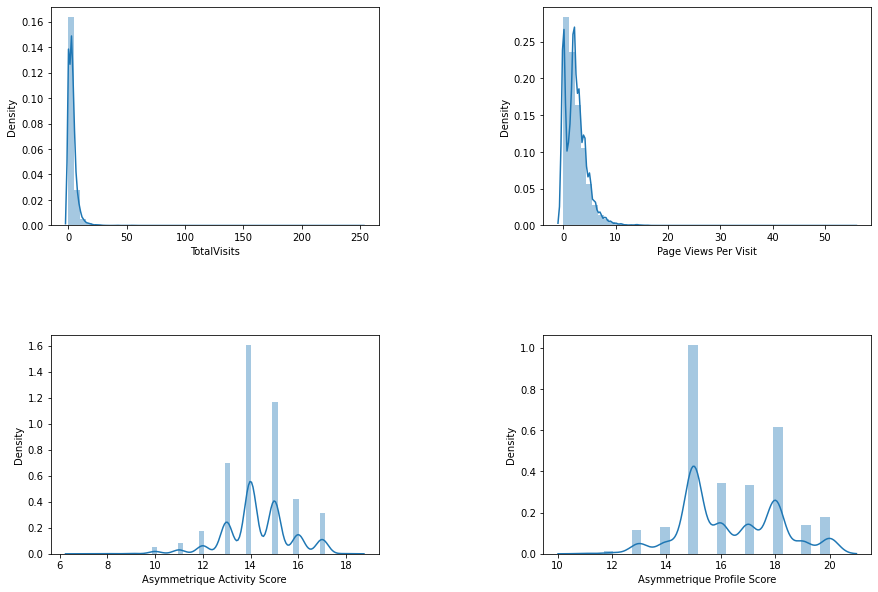

In [11]:
# Probability distribution of continuous variables

fig, axs = plt.subplots(2, 2)
sns.distplot(leads['TotalVisits'], ax = axs[0, 0])
sns.distplot(leads['Page Views Per Visit'], ax = axs[0, 1])
sns.distplot(leads['Asymmetrique Activity Score'], ax = axs[1, 0])
sns.distplot(leads['Asymmetrique Profile Score'], ax = axs[1, 1])
plt.subplots_adjust(left=0.1, right=2, top=2, bottom=0.1, hspace=0.5, wspace=0.5)

From the above distributions, we could see that:

- columns "TotalVisits" and "Page Views Per Visit" follows a right-skewed distribution, hence we can impute the missing values of these columns with their respective median values. We use *median* here because we want to normalize the skewness as much as possible. 


- columns "Asymmetrique Activity Score" and "Asymmetrique Profile Score" follows a near normal distribution, hence we can impute the missing values of these columns with their respective mean values.

**Missing value imputation**

We now impute the missing values in the columns "TotalVisits" and "Page Views Per Visit" using *median* and, the columns "Asymmetrique Activity Score" and "Asymmetrique Profile Score" using *mean*.

In [12]:
# Missing value imputation of numeric columns

leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)
leads['Asymmetrique Activity Score'].fillna(leads['Asymmetrique Activity Score'].mean(), inplace=True)
leads['Asymmetrique Profile Score'].fillna(leads['Asymmetrique Profile Score'].mean(), inplace=True)

In [13]:
# Finding out the % missing values of all the columns, from highest to lowest

round((100*leads.isnull().sum()/len(leads)).sort_values(ascending=False),2)

Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Asymmetrique Activity Score                       0.00
Asymmetrique Profile Score                        0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me 

We have filled the missing values in the columns "TotalVisits", "Page Views Per Visit", "Total Time Spent on Website", "Asymmetrique Activity Score" and "Asymmetrique Profile Score" with appropriate imputation techniques.

**Outlier detection**

Let us check/visualize for/if any outliers after imputation.

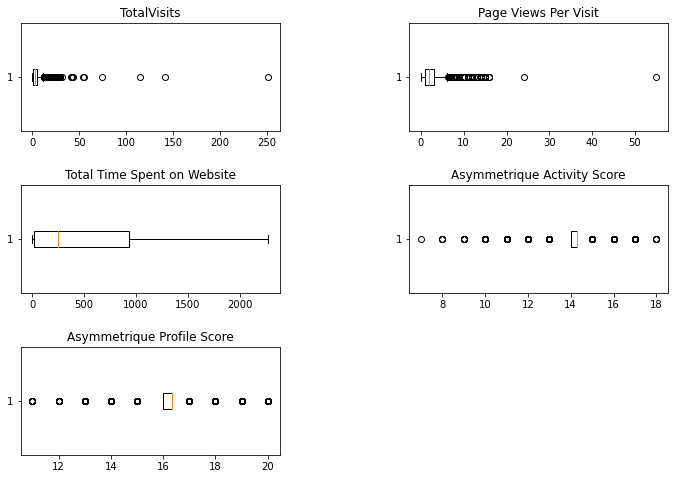

In [14]:
# Outlier detection for continuous variables

fig, axs = plt.subplots(3, 2)
axs[0, 0].boxplot(leads['TotalVisits'], vert=False)
axs[0, 0].set_title('TotalVisits')
axs[0, 1].boxplot(leads['Page Views Per Visit'], vert=False)
axs[0, 1].set_title('Page Views Per Visit')
axs[1, 0].boxplot(leads['Total Time Spent on Website'], vert=False)
axs[1, 0].set_title('Total Time Spent on Website')
axs[1, 1].boxplot(leads['Asymmetrique Activity Score'], vert=False)
axs[1, 1].set_title('Asymmetrique Activity Score')
axs[2, 0].boxplot(leads['Asymmetrique Profile Score'], vert=False)
axs[2, 0].set_title('Asymmetrique Profile Score')
fig.delaxes(axs[2, 1])
plt.subplots_adjust(left=0.001, right=1.5, top=1.5, bottom=0.001, hspace=0.5, wspace=0.5)

*Observation:*

- columns "TotalVisits" and "Page Views Per Visit" are lower bounds having outliers.
- column "Total Time Spent on Website" is having a wide range with no outliers.
- columns "Asymmetrique Activity Score" and "Asymmetrique Profile Score" have values extending from 0th or 1st percentile to 99th or 100th percentile, that is bound to relatively a very small range, having outliers. This type of distribution maybe due to too much imputation.

**Probability distribution**

Let us now look at the distribution of each of the numerical columns having missing values.

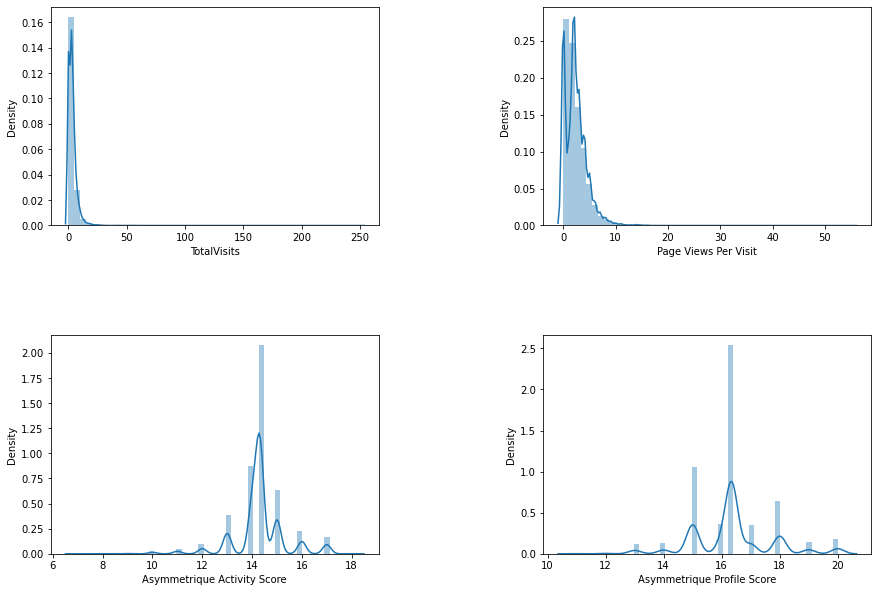

In [15]:
# Probability distribution of continuous variables

fig, axs = plt.subplots(2, 2)
sns.distplot(leads['TotalVisits'], ax = axs[0, 0])
sns.distplot(leads['Page Views Per Visit'], ax = axs[0, 1])
sns.distplot(leads['Asymmetrique Activity Score'], ax = axs[1, 0])
sns.distplot(leads['Asymmetrique Profile Score'], ax = axs[1, 1])
plt.subplots_adjust(left=0.1, right=2, top=2, bottom=0.1, hspace=0.5, wspace=0.5)

We could see that there is not a significant change in the distribution of the columns "TotalVisits" and "Page Views Per Visit" after imputation, as they had very few missing values i.e., 1.48%.

Whereas, the columns "Asymmetrique Activity Score" and "Asymmetrique Profile Score" show a significant change in the distribution after imputation, as they had many missing values i.e., 45.65%.

However, we drop the columns "Asymmetrique Activity Score" and "Asymmetrique Profile Score" after looking at its distributions since, we had imputed too many missing values.

P.S. We did not consider the column "Total Time Spent on Website" here, as it did not have any missing values i.e., 0%.

**Data Clean-up**

In [16]:
# Dropping unnecessary columns

leads.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1, inplace = True)

In [17]:
# Printing the shape of the given dataset "leads"

leads.shape

(9240, 33)

In [18]:
# Printing the list of columns

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We could see that columns "Asymmetrique Activity Score" and "Asymmetrique Profile Score" have been dropped.

In [19]:
# Finding out the % missing values of all the columns, from highest to lowest

round((100*leads.isnull().sum()/len(leads)).sort_values(ascending=False),2)

Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Get updates on DM Content                         0.00
Through Recommendations                           0.00
I agree to pay the amount through cheque          0.00
A free cop

We drop the columns having missing values > 30%

We also drop the columns "City" and "Country" since, the lead scoring is not based on locality.

In [20]:
# Dropping unnecessary columns

leads.drop(['Lead Quality', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Tags', 'City', 'Country'], axis = 1, inplace = True)

**Data Sanity check**

Let us check for data inconsistency by looking into shape, if any missing values in the given dataset after performing data clean-up. Observation on outliers has already been discussed in the section *Outlier detection*.

In [21]:
# Printing the shape of the given dataset "leads"

leads.shape

(9240, 27)

In [22]:
# Printing the list of columns

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We could see that columns "Lead Quality", "Asymmetrique Profile Index", "Asymmetrique Activity Index", "Tags", "City" and "Country" have been dropped.

In [23]:
# Finding out the % missing values of all the columns, from highest to lowest

round((100*leads.isnull().sum()/len(leads)).sort_values(ascending=False),2)

Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Newspaper                                         0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Search                                            0.00
X Education Forums                                0.00
Newspaper 

We could now see that no columns are having missing values > 30%.

**"Select" level**

Let us look at the "Select" level for all categorical variables.

In [24]:
# Percentage of the categorical level 'Select' in each variable

print('Percentage of rows with "Select" level in the column "Lead Profile" = ', round((len(leads[leads['Lead Profile'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "What matters most to you in choosing a course" = ', round((len(leads[leads['What matters most to you in choosing a course'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "What is your current occupation" = ', round((len(leads[leads['What is your current occupation'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "How did you hear about X Education" = ', round((len(leads[leads['How did you hear about X Education'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Specialization" = ', round((len(leads[leads['Specialization'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Last Activity" = ', round((len(leads[leads['Last Activity'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Lead Source" = ', round((len(leads[leads['Lead Source'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Lead Origin" = ', round((len(leads[leads['Lead Origin'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Newspaper" = ', round((len(leads[leads['Newspaper'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "A free copy of Mastering The Interview" = ', round((len(leads[leads['A free copy of Mastering The Interview'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "I agree to pay the amount through cheque" = ', round((len(leads[leads['I agree to pay the amount through cheque'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Get updates on DM Content" = ', round((len(leads[leads['Get updates on DM Content'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Update me on Supply Chain Content" = ', round((len(leads[leads['Update me on Supply Chain Content'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Receive More Updates About Our Courses" = ', round((len(leads[leads['Receive More Updates About Our Courses'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Through Recommendations" = ', round((len(leads[leads['Through Recommendations'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Digital Advertisement" = ', round((len(leads[leads['Digital Advertisement'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Search" = ', round((len(leads[leads['Search'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "X Education Forums" = ', round((len(leads[leads['X Education Forums'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Newspaper Article" = ', round((len(leads[leads['Newspaper Article'] == 'Newspaper Article']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Magazine" = ', round((len(leads[leads['Magazine'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Page Views Per Visit" = ', round((len(leads[leads['Page Views Per Visit'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Total Time Spent on Website" = ', round((len(leads[leads['Total Time Spent on Website'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "TotalVisits" = ', round((len(leads[leads['TotalVisits'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Converted" = ', round((len(leads[leads['Converted'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Do Not Call" = ', round((len(leads[leads['Do Not Call'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Do Not Email" = ', round((len(leads[leads['Do Not Email'] == 'Select']))/len(leads)*100,2))
print('Percentage of rows with "Select" level in the column "Last Notable Activity" = ', round((len(leads[leads['Last Notable Activity'] == 'Select']))/len(leads)*100,2))

Percentage of rows with "Select" level in the column "Lead Profile" =  44.87
Percentage of rows with "Select" level in the column "What matters most to you in choosing a course" =  0.0
Percentage of rows with "Select" level in the column "What is your current occupation" =  0.0
Percentage of rows with "Select" level in the column "How did you hear about X Education" =  54.58
Percentage of rows with "Select" level in the column "Specialization" =  21.02
Percentage of rows with "Select" level in the column "Last Activity" =  0.0
Percentage of rows with "Select" level in the column "Lead Source" =  0.0
Percentage of rows with "Select" level in the column "Lead Origin" =  0.0
Percentage of rows with "Select" level in the column "Newspaper" =  0.0
Percentage of rows with "Select" level in the column "A free copy of Mastering The Interview" =  0.0
Percentage of rows with "Select" level in the column "I agree to pay the amount through cheque" =  0.0
Percentage of rows with "Select" level in t

We could see that 44.87%, 54.58% and 21.02% of users in the columns "Lead Profile", "How did you hear about X Education" and "Specialization" respectively, alone have not selected any of the options.

**Data Clean-up**

We may drop those columns in which >30% of the users have not selected any option. As, these can be treated as missing values.

In [25]:
# Dropping unnecessary columns

leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [26]:
# Printing the shape of the given dataset "leads"

leads.shape

(9240, 25)

In [27]:
# Printing the list of columns

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We could see that columns "Lead Profile" and "How did you hear about X Education" have been dropped.

**Probability distribution**

We have checked the distribution of all the numerical variables during the imputation step, except for the variable "Total Time Spent on Website". So, let's look at the distribution for the same.

<AxesSubplot:xlabel='Total Time Spent on Website', ylabel='Density'>

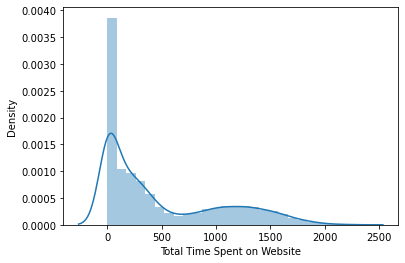

In [28]:
# Probability distribution of continuous variables

sns.distplot(leads['Total Time Spent on Website'])

We could see that the variable "Total Time Spent on Website" also follows a right-skewed distribution, just like the other numerical variables having very few missing values.

**Class Imbalance**

Let us now have a look at % of different levels for all the categorical variables.

In [29]:
# Percentage of all categorical levels in each variable

print('Percentage of each levels in the column "What matters most to you in choosing a course" is:\n\n', round(((leads['What matters most to you in choosing a course'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "What is your current occupation" is:\n\n', round(((leads['What is your current occupation'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Specialization" is:\n\n', round(((leads['Specialization'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Last Activity" is:\n\n', round(((leads['Last Activity'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Lead Source" is:\n\n', round(((leads['Lead Source'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Lead Origin" is:\n\n', round(((leads['Lead Origin'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Newspaper" is:\n\n', round(((leads['Newspaper'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "A free copy of Mastering The Interview" is:\n\n', round(((leads['A free copy of Mastering The Interview'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "I agree to pay the amount through cheque" is:\n\n', round(((leads['I agree to pay the amount through cheque'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Get updates on DM Content" is:\n\n', round(((leads['Get updates on DM Content'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Update me on Supply Chain Content" is:\n\n', round(((leads['Update me on Supply Chain Content'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Receive More Updates About Our Courses" is:\n\n', round(((leads['Receive More Updates About Our Courses'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Through Recommendations" is:\n\n', round(((leads['Through Recommendations'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Digital Advertisement" is:\n\n', round(((leads['Digital Advertisement'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Search" is:\n\n', round(((leads['Search'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "X Education Forums" is:\n\n', round(((leads['X Education Forums'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Newspaper Article" is:\n\n', round(((leads['Newspaper Article'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Magazine" is:\n\n', round(((leads['Magazine'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Do Not Call" is:\n\n', round(((leads['Do Not Call'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Do Not Email" is:\n\n', round(((leads['Do Not Email'].value_counts())/len(leads))*100,2))
print('\n')
print('Percentage of each levels in the column "Last Notable Activity" is:\n\n', round(((leads['Last Notable Activity'].value_counts())/len(leads))*100,2))

Percentage of each levels in the column "What matters most to you in choosing a course" is:

 Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64


Percentage of each levels in the column "What is your current occupation" is:

 Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64


Percentage of each levels in the column "Specialization" is:

 Select                               21.02
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking,

We could see that the variables "Newspaper", "I agree to pay the amount through cheque", "Get updates on DM Content", "Update me on Supply Chain Content", "Receive More Updates About Our Courses", "Through Recommendations", "Digital Advertisement", "Search", "X Education Forums", "Newspaper Article", "Magazine" and "Do Not Call" are biased towards almost/only a single value 'No'.

Class imbalance could also be seen in the variable "What matters most to you in choosing a course", having 70.65% of the values as 'Better Career Prospects', with 29.32% missing values. Hence, we drop this variable as well.

P.S. We did not consider the variable "Converted" here since, it is not advisable to modify the values of the target variable, irrespective of any data inconsistency/imbalance.

**Data Clean-up**

Let us drop the variables having biased 'No' values.

In [30]:
# Dropping unnecessary columns

leads.drop(['Newspaper', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement', 'Search', 'X Education Forums', 'Newspaper Article', 'Magazine', 'Do Not Call', 'What matters most to you in choosing a course'], axis = 1, inplace = True)

In [31]:
# Printing the shape of the given dataset "leads"

leads.shape

(9240, 12)

In [32]:
# Printing the list of columns

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We could see that variables having biased 'No' values have been dropped.

**Data Imbalance**

We have now cleaned up our data as much as possible. Now, let us now look at the percentage of missing values for each of the columns.

In [33]:
# Finding out the % missing values of all the columns, from highest to lowest

round((100*leads.isnull().sum()/len(leads)).sort_values(ascending=False),2)

What is your current occupation           29.11
Specialization                            15.56
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

As already mentioned, the value 'Select' is treated as a missing value. We have not yet made any changes to the variable "Specialization" since, it had only 21.02% of its rows as level 'Select', which was <30%.

Now, let us look at the number of rows with level 'Select' in the variable "Specialization".

In [34]:
# Count of categorical level 'Select' in the variable "Specialization"

(leads['Specialization'] == 'Select').value_counts()

False    7298
True     1942
Name: Specialization, dtype: int64

**Data Clean-up**

We still have missing values in some of the columns of our dataset. However, we keep these columns as it may be important from a business perspective, also that we have already dropped many columns.

Hence, we selectively drop the rows (entire record) containing missing values of each column.

In [35]:
# Removing NaN rows in any column

leads.dropna(inplace=True)

In [36]:
# Printing the shape of the given dataset "leads"

leads.shape

(6395, 12)

**'Select' level / Missing value Imputation**

Now, that already we have removed 2845 rows, we do not want to remove any further rows. As, we now have about 1849 rows with level 'Select' in the variable "Specialization", we impute these rows with the highest occuring value i.e., mode for this column/variable.

Let us first look at the highest occuring value in the column "Specialization".

In [37]:
# Most frequent value in the variable "Specialization"

leads['Specialization'].mode()

0    Select
dtype: object

We could see that 'Select' is the highest occuring value in the column "Specialization". So, cannot make any further changes to this column. However, we may continue to treat this particular value as a missing value in our observation. Hence, may ignore the same while making any inferences.

**Data Sanity check**

Let us check for data inconsistency by looking into shape, data types and missing values after performing final data clean-up.

In [38]:
# Printing the shape of the given dataset "leads"

leads.shape

(6395, 12)

In [39]:
# Printing the list of columns, entries/rows, number of null/missing values, data types of the given dataset "leads"

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6395 non-null   object 
 1   Lead Source                             6395 non-null   object 
 2   Do Not Email                            6395 non-null   object 
 3   Converted                               6395 non-null   int64  
 4   TotalVisits                             6395 non-null   float64
 5   Total Time Spent on Website             6395 non-null   int64  
 6   Page Views Per Visit                    6395 non-null   float64
 7   Last Activity                           6395 non-null   object 
 8   Specialization                          6395 non-null   object 
 9   What is your current occupation         6395 non-null   object 
 10  A free copy of Mastering The Interview  6395 non-null   obje

In [40]:
# Finding out the % missing values of all the columns, from highest to lowest

round((100*leads.isnull().sum()/len(leads)).sort_values(ascending=False),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

We now don't have any missing values in our dataset i.e., 0% for all columns. However, the number of rows have come down from 9240 to 6395 i.e., we have retained 69.21% of the rows.

**Univariate analysis for numerical data**

Univariate analysis for numerical data (box plot) had already been carried out in the section *Outlier detection*.

**Univariate Analysis for categorical data**

Let us look at the number of leads generated, categorically.

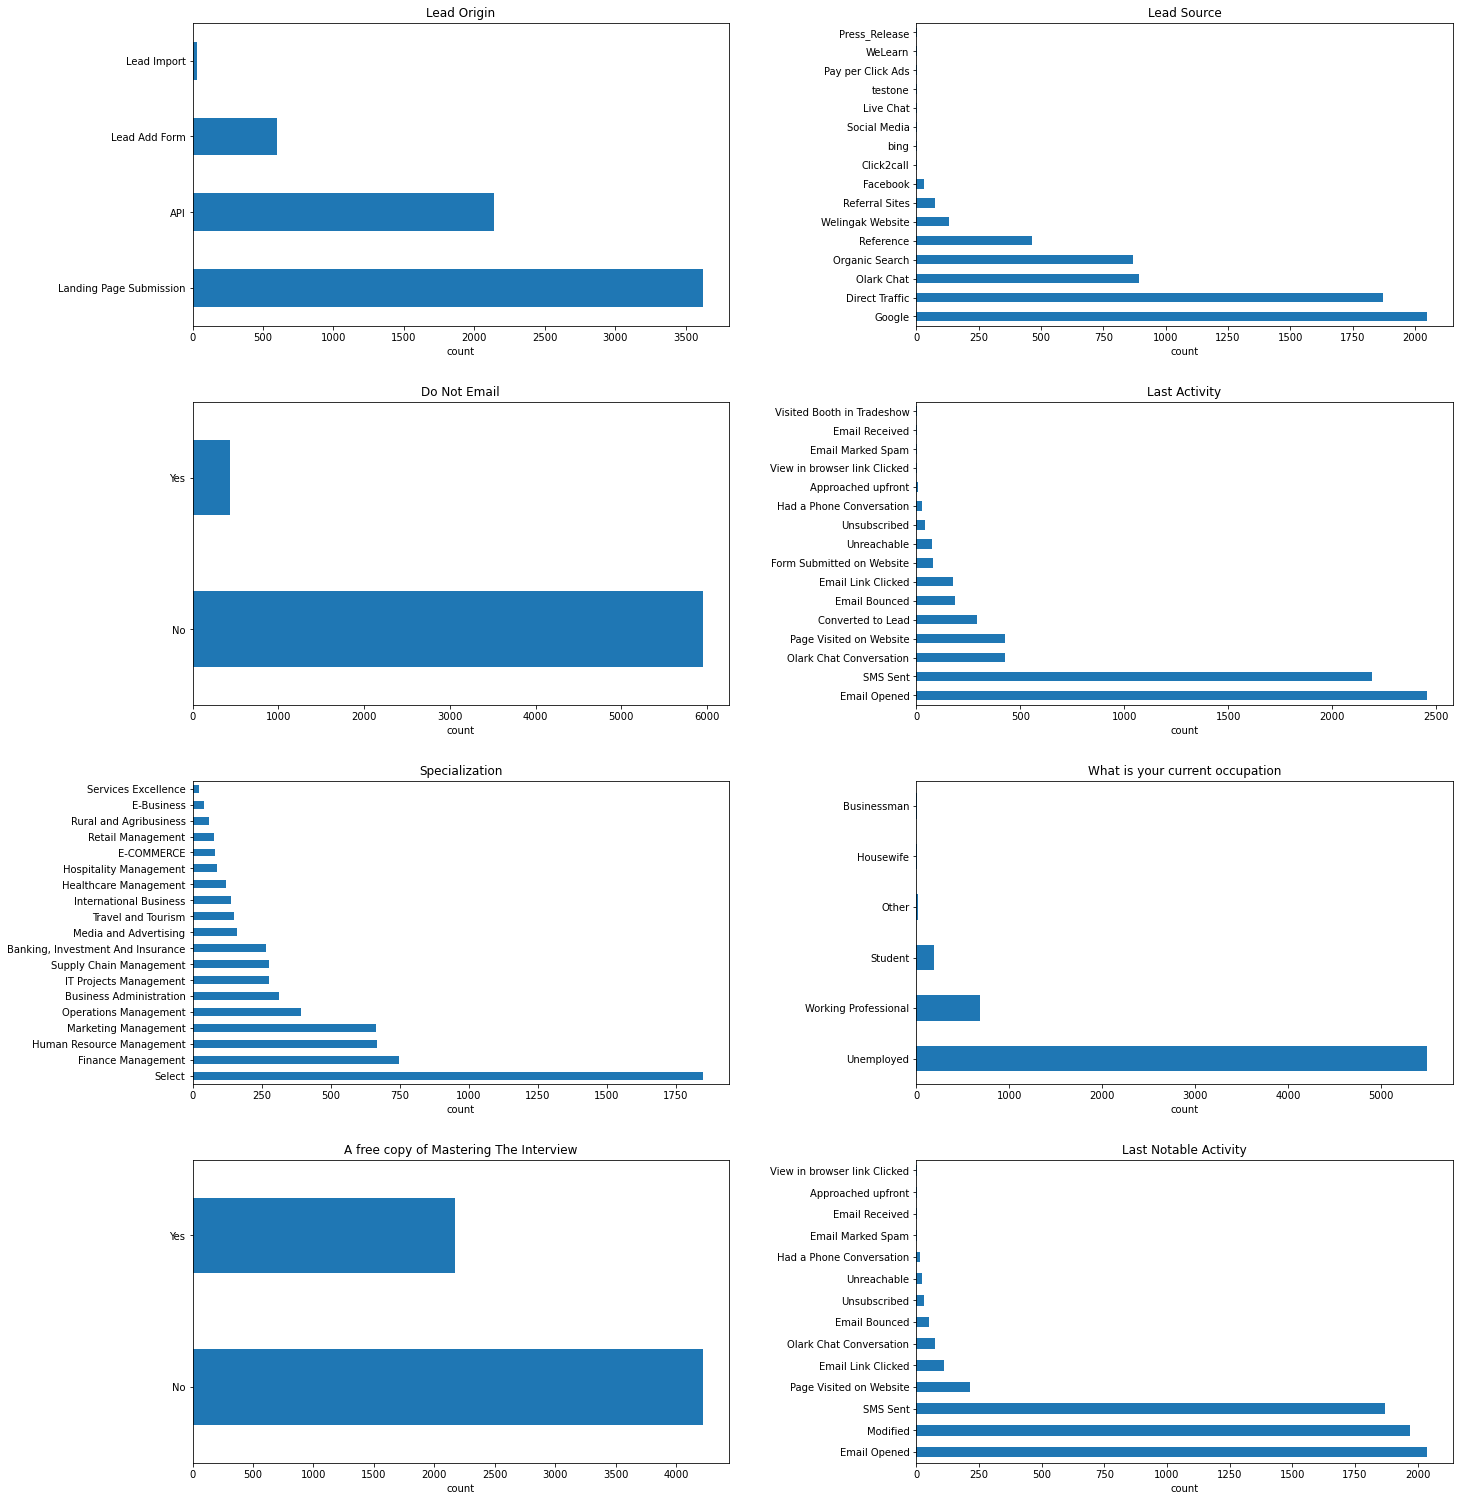

In [41]:
# Visualization of lead generation, categorically

plt.figure(figsize=(10, 40))
plt.subplot(4,2,1)
leads['Lead Origin'].value_counts().plot.barh()
plt.title('Lead Origin')
plt.xlabel('count')
plt.subplot(4,2,2)
leads['Lead Source'].value_counts().plot.barh()
plt.title('Lead Source')
plt.xlabel('count')
plt.subplot(4,2,3)
leads['Do Not Email'].value_counts().plot.barh()
plt.title('Do Not Email')
plt.xlabel('count')
plt.subplot(4,2,4)
leads['Last Activity'].value_counts().plot.barh()
plt.title('Last Activity')
plt.xlabel('count')
plt.subplot(4,2,5)
leads['Specialization'].value_counts().plot.barh()
plt.title('Specialization')
plt.xlabel('count')
plt.subplot(4,2,6)
leads['What is your current occupation'].value_counts().plot.barh()
plt.title('What is your current occupation')
plt.xlabel('count')
plt.subplot(4,2,7)
leads['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.title('A free copy of Mastering The Interview')
plt.xlabel('count')
plt.subplot(4,2,8)
leads['Last Notable Activity'].value_counts().plot.barh()
plt.title('Last Notable Activity')
plt.xlabel('count')
plt.subplots_adjust(left=0, right=1.75, top=0.5, bottom=0, hspace=0.25, wspace=0.35)
plt.show()

*Observation*

- Highest number of leads were identified from the landing page, who provided the required information via a Google page/form.
- Most leads opted for Email services. Also, their last activity was opening Email, be a student or not.
- Most people who were working in the roles of Finance, HR and Marketing management, now unemployed, became a lead.
- Most leads did not opt for a free copy of mastering the interview.

**Target variable**

Looking at the percentage of leads who have been converted into paying customers.

<AxesSubplot:ylabel='Converted'>

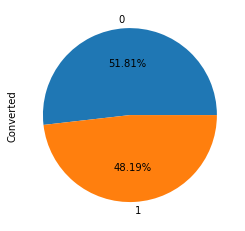

In [42]:
# Lead conversion rate

leads.Converted.value_counts().plot.pie(autopct='%1.2f%%')

We could see that only 48.19% of the leads have been converted into paying customers. Whereas, 51.81% of them continue to be just leads. Our *aim* is to build a Logistic Regression model, so as to increase the lead conversion rate to 80%.

Note (from problem statement):
- 0 = No; 1 = Yes
- Lead conversion rate was 30% before clean-up

**Bivariate Analysis for numerical data**

Let us find out the pair-wise association between all the numeric variables.

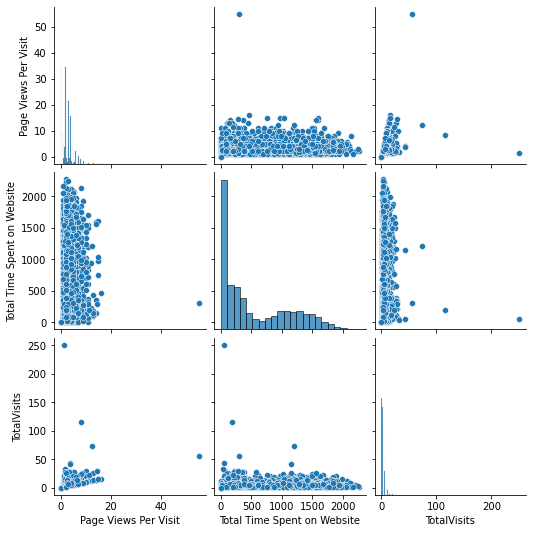

In [43]:
# Visualization of pair-wise associations of the numerical variables

sns.pairplot(leads[['Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits']])
plt.show()

*Observation:*

- People spending more time on the website have their browsing frequency and, number of pages viewed per visit almost same as that of the people spending far lesser time, with a very minute dip.
- Browsing frequency increases with an increase in number of pages viewed per visit.

Let us now look at the percentage of leads who have been converted into paying customers, based on the above activity.

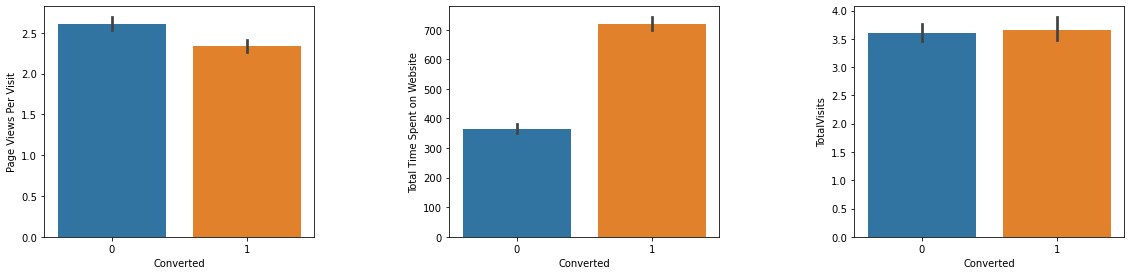

In [44]:
# Percentage of converted and non-converted leads

plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
sns.barplot(x='Converted', y='Page Views Per Visit', data=leads)
plt.subplot(1,3,2)
sns.barplot(x='Converted', y='Total Time Spent on Website', data=leads)
plt.subplot(1,3,3)
sns.barplot(x='Converted', y='TotalVisits', data=leads)
plt.subplots_adjust(left=0.3, right=1.3, top=0.9, bottom=0.1, hspace=0.4, wspace=0.5)
plt.show()

*Observation*

- Leads who spend more spend more time on visiting the website have a high conversion rate. Whereas, those who visit more number of pages have a low conversion rate.
- Leads who visit the site frequently have an equal chance of getting converted and not. 

**Bivariate Analysis for categorical data**

Let us now look at the percentage of leads who have been converted into paying customers, categorically.

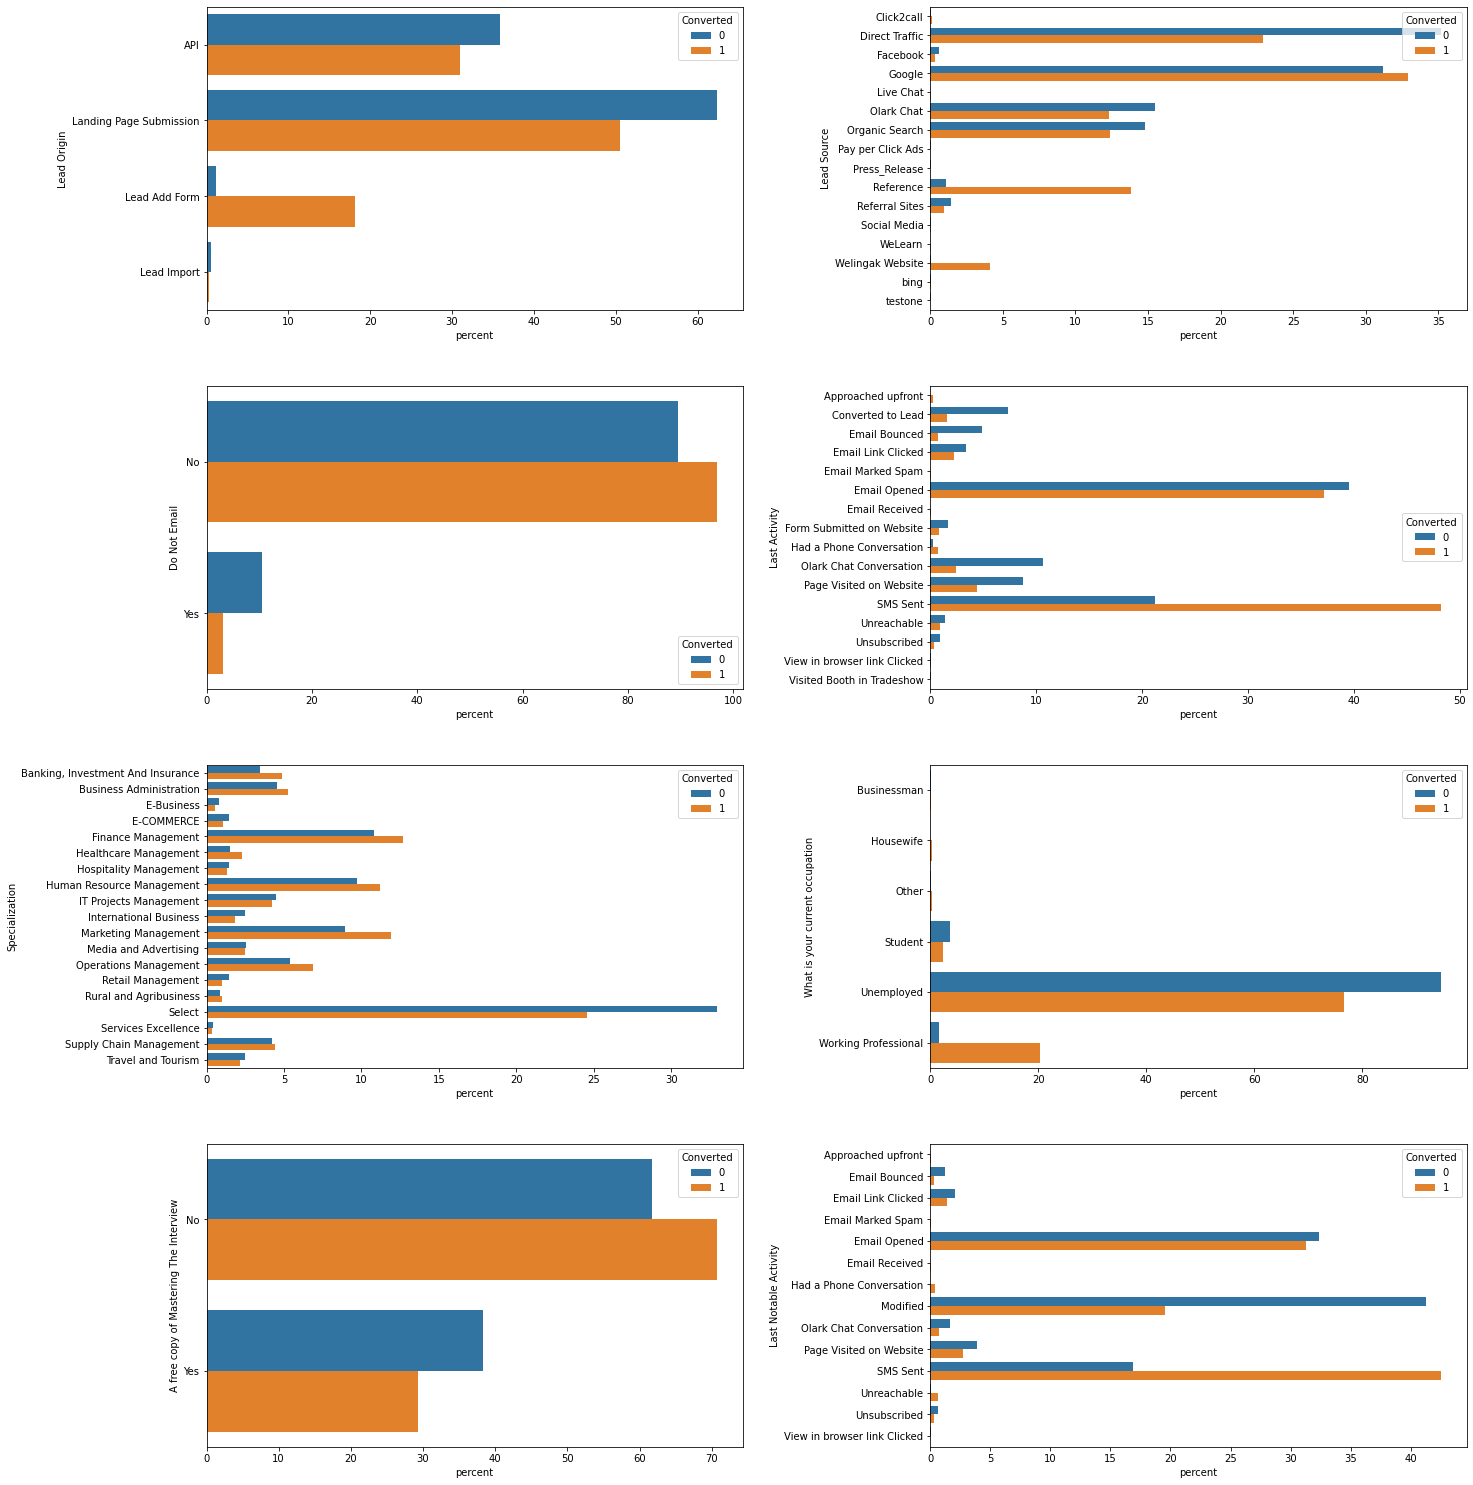

In [45]:
# Visualization of lead conversion rate, categorically

plt.figure(figsize=(10, 40))
plt.subplot(4,2,1)
leads_LeadOrigin = (leads.groupby(['Converted'])['Lead Origin'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('Lead Origin'))
sns.barplot(x='percent', y='Lead Origin', hue='Converted', data=leads_LeadOrigin, orient='h')
plt.subplot(4,2,2)
leads_LeadSource = (leads.groupby(['Converted'])['Lead Source'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('Lead Source'))
sns.barplot(x='percent', y='Lead Source', hue='Converted', data=leads_LeadSource, orient='h')
plt.subplot(4,2,3)
leads_DoNotEmail = (leads.groupby(['Converted'])['Do Not Email'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('Do Not Email'))
sns.barplot(x='percent', y='Do Not Email', hue='Converted', data=leads_DoNotEmail, orient='h')
plt.subplot(4,2,4)
leads_LastActivity = (leads.groupby(['Converted'])['Last Activity'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('Last Activity'))
sns.barplot(x='percent', y='Last Activity', hue='Converted', data=leads_LastActivity, orient='h')
plt.subplot(4,2,5)
leads_Specialization = (leads.groupby(['Converted'])['Specialization'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('Specialization'))
sns.barplot(x='percent', y='Specialization', hue='Converted', data=leads_Specialization, orient='h')
plt.subplot(4,2,6)
leads_Whatisyourcurrentoccupation = (leads.groupby(['Converted'])['What is your current occupation'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('What is your current occupation'))
sns.barplot(x='percent', y='What is your current occupation', hue='Converted', data=leads_Whatisyourcurrentoccupation, orient='h')
plt.subplot(4,2,7)
leads_AfreecopyofMasteringTheInterview = (leads.groupby(['Converted'])['A free copy of Mastering The Interview'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('A free copy of Mastering The Interview'))
sns.barplot(x='percent', y='A free copy of Mastering The Interview', hue='Converted', data=leads_AfreecopyofMasteringTheInterview, orient='h')
plt.subplot(4,2,8)
leads_LastNotableActivity = (leads.groupby(['Converted'])['Last Notable Activity'].value_counts(normalize=True).rename('percent').mul(100).reset_index().sort_values('Last Notable Activity'))
sns.barplot(x='percent', y='Last Notable Activity', hue='Converted', data=leads_LastNotableActivity, orient='h')
plt.subplots_adjust(left=0, right=1.75, top=0.5, bottom=0, hspace=0.25, wspace=0.35)
plt.show()

*Observation*

- Highest lead conversion rate is acquired by the leads identified from the landing page, who provided the required information via a Google page/form.
- Leads who opted for Email services have a much higher conversion rate. However, their last activity was sending an SMS, be a student or not.
- Leads who were working in the roles of Finance, HR and Marketing management, now unemployed, have a much higher conversion rate.
- Leads who did not opt for a free copy of mastering the interview, have a much higher conversion rate.

## Model Building

**Dummy variable creation**

Let us look at the indicators for all the levels of categorical variables, after creating their corresponding dummies. 

In [46]:
# Getting dummies for all the categorical columns and, storing them into their respective dummy data columns

LeadOrigin = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')
LeadSource = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
DoNotEmail = pd.get_dummies(leads['Do Not Email'], prefix='Do Not Email')
LastActivity = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
Specialization = pd.get_dummies(leads['Specialization'], prefix='Specialization')
Whatisyourcurrentoccupation = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
AfreecopyofMasteringTheInterview = pd.get_dummies(leads['A free copy of Mastering The Interview'], prefix='A free copy of Mastering The Interview')
LastNotableActivity = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity')

In [47]:
#Printing the dummy variables / indicators

print('\nLead Origin\n')
print(LeadOrigin.head())
print('\nLead Source\n')
print(LeadSource.head())
print('\nDo Not Email\n')
print(DoNotEmail.head())
print('\nLast Activity\n')
print(LastActivity.head())
print('\nSpecialization\n')
print(Specialization.head())
print('\nWhat is your current occupation\n')
print(Whatisyourcurrentoccupation.head())
print('\nA free copy of Mastering The Interview\n')
print(AfreecopyofMasteringTheInterview.head())
print('\nLast Notable Activity\n')
print(LastNotableActivity.head())


Lead Origin

   Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  
0                          0                        0  
1                          0                        0  
2                          0                        0  
3                          0                        0  
4                          0                        0  

Lead Source

   Lead Source_Click2call  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                       0                           0                     0   
1                       0                           0                     0   
2                       0                   

In [48]:
# Number of categroical levels

print('1. Number of categorical levels for the variable "Lead Origin" = ', len(LeadOrigin.columns))
print('2. Number of categorical levels for the variable "Lead Source" = ', len(LeadSource.columns))
print('3. Number of categorical levels for the variable "Do Not Email" = ', len(DoNotEmail.columns))
print('4. Number of categorical levels for the variable "Last Activity" = ', len(LastActivity.columns))
print('5. Number of categorical levels for the variable "Specialization" = ', len(Specialization.columns))
print('6. Number of categorical levels for the variable "What is your current occupation" = ', len(Whatisyourcurrentoccupation.columns))
print('7. Number of categorical levels for the variable "A free copy of Mastering The Interview" = ', len(AfreecopyofMasteringTheInterview.columns))
print('8. Number of categorical levels for the variable "Last Notable Activity" = ', len(LastNotableActivity.columns))
print('-------------\nTotal = ', len(LeadOrigin.columns) + len(LeadSource.columns) + len(DoNotEmail.columns) + len(LastActivity.columns) + len(Specialization.columns) + len(Whatisyourcurrentoccupation.columns) + len(AfreecopyofMasteringTheInterview.columns) + len(LastNotableActivity.columns), '\n-------------')

1. Number of categorical levels for the variable "Lead Origin" =  4
2. Number of categorical levels for the variable "Lead Source" =  16
3. Number of categorical levels for the variable "Do Not Email" =  2
4. Number of categorical levels for the variable "Last Activity" =  16
5. Number of categorical levels for the variable "Specialization" =  19
6. Number of categorical levels for the variable "What is your current occupation" =  6
7. Number of categorical levels for the variable "A free copy of Mastering The Interview" =  2
8. Number of categorical levels for the variable "Last Notable Activity" =  14
-------------
Total =  79 
-------------


If we have *n* categorical levels, then we need just *(n-1)* dummy variables. Hence, dropping the first indicator for all categorical variables.

In [49]:
# Dropping first dummy

LeadOrigin = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin', drop_first = True)
LeadSource = pd.get_dummies(leads['Lead Source'], prefix='Lead Source', drop_first = True)
DoNotEmail = pd.get_dummies(leads['Do Not Email'], prefix='Do Not Email', drop_first = True)
LastActivity = pd.get_dummies(leads['Last Activity'], prefix='Last Activity', drop_first = True)
Specialization = pd.get_dummies(leads['Specialization'], prefix='Specialization', drop_first = True)
Whatisyourcurrentoccupation = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation', drop_first = True)
AfreecopyofMasteringTheInterview = pd.get_dummies(leads['A free copy of Mastering The Interview'], prefix='A free copy of Mastering The Interview', drop_first = True)
LastNotableActivity = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Notable Activity', drop_first = True)

In [50]:
# We also drop the variable 'Specialization_Select' since it is treated as missing values

Specialization.drop(['Specialization_Select'], axis = 1, inplace = True)

In [51]:
# Number of categroical levels

print('1. Number of categorical levels for the variable "Lead Origin" = ', len(LeadOrigin.columns))
print('2. Number of categorical levels for the variable "Lead Source" = ', len(LeadSource.columns))
print('3. Number of categorical levels for the variable "Do Not Email" = ', len(DoNotEmail.columns))
print('4. Number of categorical levels for the variable "Last Activity" = ', len(LastActivity.columns))
print('5. Number of categorical levels for the variable "Specialization" = ', len(Specialization.columns))
print('6. Number of categorical levels for the variable "What is your current occupation" = ', len(Whatisyourcurrentoccupation.columns))
print('7. Number of categorical levels for the variable "A free copy of Mastering The Interview" = ', len(AfreecopyofMasteringTheInterview.columns))
print('8. Number of categorical levels for the variable "Last Notable Activity" = ', len(LastNotableActivity.columns))
print('-------------\nTotal = ', len(LeadOrigin.columns) + len(LeadSource.columns) + len(DoNotEmail.columns) + len(LastActivity.columns) + len(Specialization.columns) + len(Whatisyourcurrentoccupation.columns) + len(AfreecopyofMasteringTheInterview.columns) + len(LastNotableActivity.columns), '\n-------------')

1. Number of categorical levels for the variable "Lead Origin" =  3
2. Number of categorical levels for the variable "Lead Source" =  15
3. Number of categorical levels for the variable "Do Not Email" =  1
4. Number of categorical levels for the variable "Last Activity" =  15
5. Number of categorical levels for the variable "Specialization" =  17
6. Number of categorical levels for the variable "What is your current occupation" =  5
7. Number of categorical levels for the variable "A free copy of Mastering The Interview" =  1
8. Number of categorical levels for the variable "Last Notable Activity" =  13
-------------
Total =  70 
-------------


We could now see that we have *(n-1)* dummies for the corresponding categorical variables, each with respective *n* levels. Also, the variable 'Specialization_Select' has been dropped.

**Appending the dummies and data clean-up**

We will now replace all the categorical variables with its corresponding dummies.

In [52]:
# Adding dummies to the dataset "leads"

leads = pd.concat([leads, LeadOrigin, LeadSource, DoNotEmail, LastActivity, Specialization, Whatisyourcurrentoccupation, AfreecopyofMasteringTheInterview, LastNotableActivity], axis = 1)

In [53]:
# Printing the dataset "leads"

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


We could see that 70 columns i.e., all dummies have been added to our dataset.

In [54]:
# Dropping original columns

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1, inplace = True)

In [55]:
# Printing the dataset "leads"

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


We could see that 8 columns i.e., categorical variables have been removed from our dataset.

P.S. Variable 'Converted' is not handled here since, it is the target variable.

**Data Sanity check**

Let us check for data inconsistency by looking into shape, data types, if any missing values in our dataset, after dummification.

In [56]:
# Printing the shape of the given dataset "leads"

leads.shape

(6395, 74)

In [57]:
# Printing the list of columns, entries/rows, number of null/missing values, data types of the given dataset "leads"

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6395 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6395 non-null   int64  
 1   TotalVisits                                           6395 non-null   float64
 2   Total Time Spent on Website                           6395 non-null   int64  
 3   Page Views Per Visit                                  6395 non-null   float64
 4   Lead Origin_Landing Page Submission                   6395 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6395 non-null   uint8  
 6   Lead Origin_Lead Import                               6395 non-null   uint8  
 7   Lead Source_Direct Traffic                            6395 non-null   uint8  
 8   Lead Source_Facebook                                  6395

We could see that the rows are intact and, there are no missing values in our dataset. All the dummies have the data type as unsigned hexadecimal integer, as it is boolean in nature.

**Train-Test data split**

- We perform a 70:30 (%) split on the given dataset "leads" as train:test datasets and, store the same in "leads_train" and "leads_test", respectively.
- We keep the randomness a constant (with ID = 100) for selecting the same set of data points, for every iteration.

In [58]:
# Performing Train-Test data split, importing necessary library

from sklearn.model_selection import train_test_split

leads_train, leads_test = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
# Printing train & test data

print('\nleads_train\n')
print(leads_train.head())
print('\nleads_test\n')
print(leads_test.head())


leads_train

      Converted  TotalVisits  Total Time Spent on Website  \
1322          0          3.0                          505   
2979          1          0.0                            0   
6460          1          3.0                         1698   
5800          1          0.0                            0   
4122          0          1.0                          339   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
1322                   3.0                                    1   
2979                   0.0                                    0   
6460                   3.0                                    1   
5800                   0.0                                    0   
4122                   1.0                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1322                          0                        0   
2979                          1                        0   
6460                          0     

**Dividing our *train* dataset into input *X* and output *y***

We divide the *train* data set into inputs and output. Inputs are all the feature variables that we have and, output is the target variable that was given in the problem statement.

In [60]:
# Dividing train dataset into I/P & O/P

y_train = leads_train.pop('Converted')
X_train = leads_train

In [61]:
# Printing the I/P & O/P train datasets

print('\nX_train\n')
print(X_train)
print('\ny_train\n')
print(y_train)


X_train

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
1322          3.0                          505                  3.00   
2979          0.0                            0                  0.00   
6460          3.0                         1698                  3.00   
5800          0.0                            0                  0.00   
4122          1.0                          339                  1.00   
...           ...                          ...                   ...   
8730          7.0                          330                  7.00   
100           7.0                         1633                  3.50   
5862         11.0                         1549                  1.57   
8624         27.0                          573                  1.93   
8187          0.0                            0                  0.00   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1322                                    1            

**Dividing our *test* dataset into input *X* and output *y***

We divide the *test* data set into inputs and output. Inputs are all the feature variables that we have and, output is the target variable that was given in the problem statement.

In [62]:
# Dividing test dataset into I/P & O/P

y_test = leads_test.pop('Converted')
X_test = leads_test

In [63]:
# Printing the I/P & O/P test datasets

print('\nX_test\n')
print(X_test)
print('\ny_test\n')
print(y_test)


X_test

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5390          0.0                            0                  0.00   
584           7.0                          305                  2.33   
2894          5.0                         1287                  5.00   
7626          5.0                           37                  2.50   
8418          2.0                         1414                  2.00   
...           ...                          ...                   ...   
7036          2.0                         1311                  1.00   
7498          6.0                           36                  3.00   
1739          2.0                         1948                  2.00   
3612          6.0                          259                  2.00   
7218          2.0                          150                  2.00   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5390                                    0             

**Probability distribution & Outlier detection**

Let us now check for any outliers and, the probability distribution of the numerical variables to decide whether to achieve scaling through normalization or standardization. 

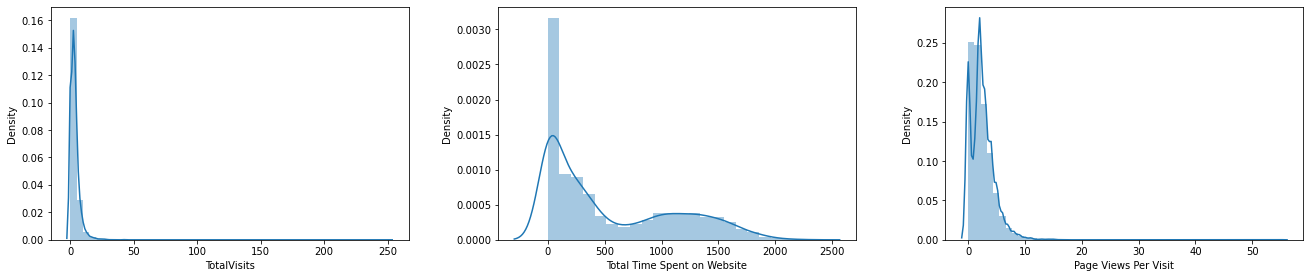

In [64]:
# Probability distribution of continuous variables

fig, axs = plt.subplots(2, 3)
sns.distplot(leads['TotalVisits'], ax = axs[0, 0])
sns.distplot(leads['Total Time Spent on Website'], ax = axs[0, 1])
sns.distplot(leads['Page Views Per Visit'], ax = axs[0, 2])
fig.delaxes(axs[1, 0])
fig.delaxes(axs[1, 1])
fig.delaxes(axs[1, 2])
plt.subplots_adjust(left=0.1, right=3, top=1.8, bottom=0.1, hspace=0.1, wspace=0.25)

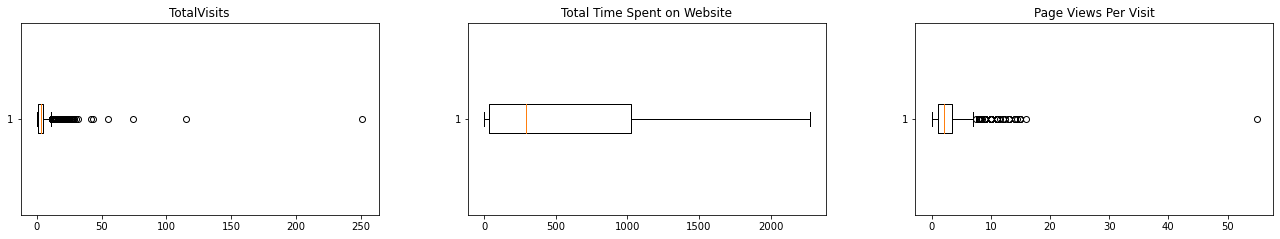

In [65]:
# Outlier detection for continuous variables

fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(leads['TotalVisits'], vert=False)
axs[0, 0].set_title('TotalVisits')
axs[0, 1].boxplot(leads['Total Time Spent on Website'], vert=False)
axs[0, 1].set_title('Total Time Spent on Website')
axs[0, 2].boxplot(leads['Page Views Per Visit'], vert=False)
axs[0, 2].set_title('Page Views Per Visit')
fig.delaxes(axs[1, 0])
fig.delaxes(axs[1, 1])
fig.delaxes(axs[1, 2])
plt.subplots_adjust(left=0.1, right=3, top=1.5, bottom=0.1, hspace=0.1, wspace=0.25)

*Observation*

- All the variables follow a right-skewed probability distribution. Variable 'Total Time Spent on Website' has the least skewness, followed by the variables 'Page Views Per Visit' and 'TotalVisits'. Note that the variable 'Total Time Spent on Website' appears to have two adjacent normal distributions, with high and low slopes respectively, contributing to an overall skewness.


- Variable 'Total Time Spent on Website' has no outliers, however has a very wide range with a huge difference between its 75th percentile and 99th percentile. Variable 'Page Views Per Visit' have limited range of outliers (one data point can be ignored). Variable 'TotalVisits' have wide range of outliers.

**Scaling *train* data**

We go with *standard()* scaler method to acquiesce the outliers and the wide range. Also, the variable 'Total Time Spent on Website' has low skewness.

We perform *standard* scaling on the numerical variables of the *train* dataset, by learning/fitting the values and, transforming/standardizing them.

In [66]:
# Creating the function for scaling, importing necessary library

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [67]:
# Creating pandas series with numerical I/P variables

num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

Note that 'Converted' is a boolean variable, not numeric.

In [68]:
# Scaling numerical I/P variables

leads_train[num_var] = scale.fit_transform(leads_train[num_var])

In [69]:
# Printing train dataset

leads_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1322,-0.127444,-0.074306,0.214584,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2979,-0.670201,-0.959019,-1.133651,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6460,-0.127444,2.015720,0.214584,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5800,-0.670201,-0.959019,-1.133651,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4122,-0.489282,-0.365122,-0.684239,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


**Scaling *test* data**

We perform *standard()* scaling on the *test* dataset, by transforming the scaling that was applied on the *train* dataset. Now, the model depicts its learnings from the *train* data onto the *test* data.

In [70]:
# Scaling test data with numerical I/P variables

leads_test[num_var] = scale.transform(leads_test[num_var])

In [71]:
# Printing test dataset

leads_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5390,-0.670201,-0.959019,-1.133651,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
584,0.596233,-0.424687,-0.086522,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2894,0.234395,1.295686,1.113407,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7626,0.234395,-0.894199,-0.010122,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8418,-0.308363,1.518178,-0.234828,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Correlation Matrix**

We find the correlation between all the variables of our dataset.

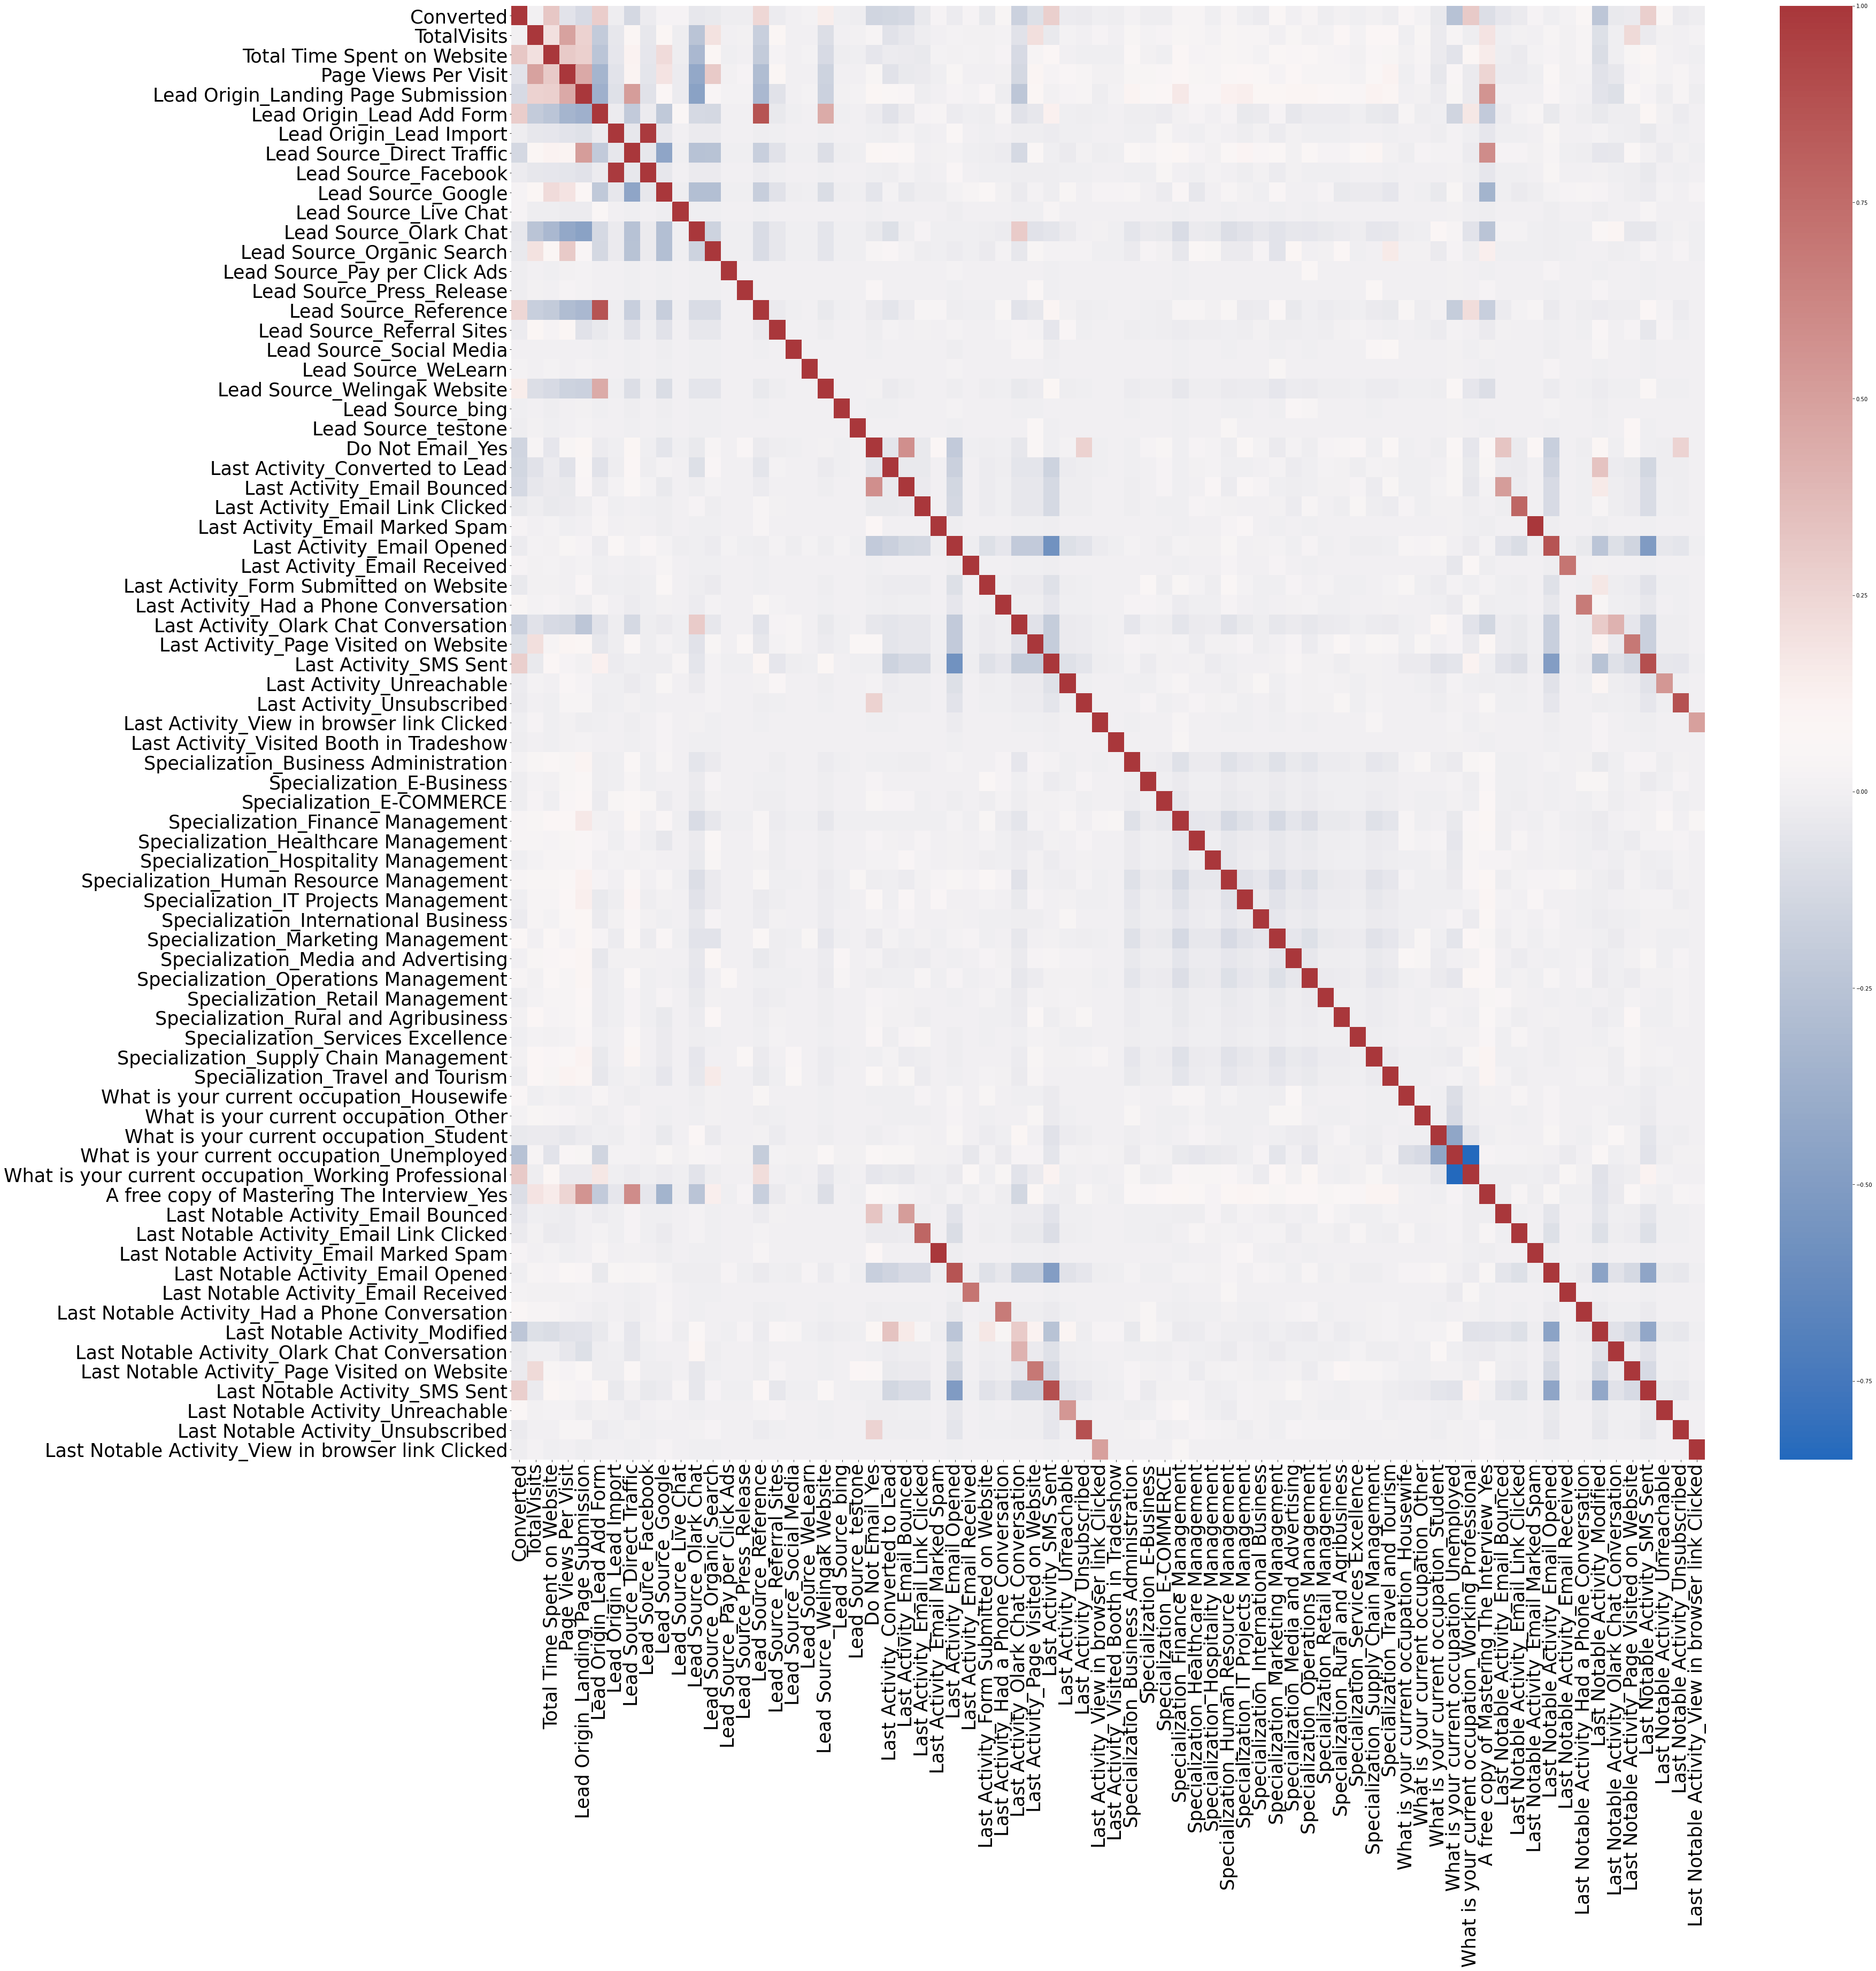

In [72]:
# Finding correlation between all variables

plt.figure(figsize=(50,50))
sns.heatmap(leads.corr(), cmap='vlag')
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.show()

*Observation*

- A vast majority of the variables form weak positive to weak negative correlations with each other.
- The variable 'Converted' alone forms strong correlations with all the variables since, it is the target variable.
- A minority of the variables form strong positive and strong negative correlations with each other, ignoring the target variable.

P.S. Legend stretches from -0.75 (strong negative correlation) to +1.00 (strong positive correlation).

**Feature selection in *train* data**

We use a combined feature selection method by first eliminating the features in bulk using automated approach, then eliminating manually by looking at the p-values & VIFs for each after every iteration of logistic regression. 

**Recursive Feature Elimination (RFE) of *train* data**

Step-by-step procedure is given in detail, under the comment section of each code stub. Some info is also given outside the stub for clarity.

In [73]:
# Creating the function for performing logistic regression, importing necessary library

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

In [74]:
# Fitting the logistic regression function on the output variable using the input variables

logr.fit(X_train, y_train)

LogisticRegression()

In [75]:
# Performing RFE, importing necessary library

from sklearn.feature_selection import RFE

rfe = RFE(logr, 15)

In [76]:
# Fitting the learnings from the RFE performed on the input variables onto the output variable

rfe = rfe.fit(X_train, y_train)

In [77]:
# Finding RFE Rank & RFE Support for each feature

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 49),
 ('Lead Source_testone', False, 30),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Cl

In [78]:
# Selecting only significant (true) features, removing all the insignificant features (false) irrespective of their rank

rfe_select = X_train[X_train.columns[rfe.support_]]

In [79]:
# Printing the significant features, selected using RFE

rfe_select

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
1322,-0.074306,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2979,-0.959019,1,0,0,1,0,0,0,1,0,0,1,0,0,0
6460,2.015720,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5800,-0.959019,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4122,-0.365122,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,-0.380890,0,0,0,0,0,0,0,1,0,0,1,0,0,0
100,1.901846,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5862,1.754686,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8624,0.044824,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**Logistic regression on *train* data for manual feature elimination**

We follow the below steps for all iterations of logistic regression.

- Performing logistic regression by using Generalized Linear Model (GLM) to fit the model following Binomial distribution of families.
- Adding the constant (*1) for quantification. Constant not available in Statsmodels library by default.
- Printing the logistic regression results.

In [80]:
# Importing Statsmodels library to perform logistic regression

import statsmodels.api as sm

In [81]:
# Iteration 1 (model re-building)

logr1 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_select.columns])), family = sm.families.Binomial())
logr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4476
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.3
Date:                Wed, 08 Dec 2021   Deviance:                       4140.6
Time:                        22:24:14   Pearson chi2:                 5.09e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4767      0.633      0.753      0.451      -0.764       1.717
Total Time Spent on Website                              1.1288      0.047     24.240      0.000       1.038       1.220
Lead Origin_Lead Add Form                                2.8859      1.173      2.460      0.014       0.586       5.185
Lead Source_Olark Chat                                   1.4055      0.118     11.865      0.000       1.173       1.638
Lead Source_Reference                                    0.7099      1.192      0.596      0.551      -1.626       3.046
Lead Source_Welingak Website                             3.0726      1.546      1.987      0.047       0.042       6.103
Do Not Email_Yes                                        -1.4940      0.197     -7.601      0.000      -1.879      -1.109
Last Activity_Converted to Lead                         -1.2411      0.239     -5.185      0.000      -1.710      -0.772
Last Activity_Olark Chat Conversation                   -1.2380      0.182     -6.801      0.000      -1.595      -0.881
Last Activity_SMS Sent                                   1.1187      0.084     13.296      0.000       0.954       1.284
Last Activity_Unsubscribed                               1.0662      0.509      2.094      0.036       0.068       2.064
What is your current occupation_Student                 -1.2420      0.664     -1.872      0.061      -2.542       0.058
What is your current occupation_Unemployed              -1.3954      0.634     -2.201      0.028      -2.638      -0.153
What is your current occupation_Working Professional     1.0703      0.660      1.623      0.105      -0.222       2.363
Last Notable Activity_Had a Phone Conversation          22.7841   1.22e+04      0.002      0.999   -2.39e+04    2.39e+04
Last Notable Activity_Unreachable                        3.3928      1.069      3.172      0.002       1.297       5.489
========================================================================================================================
"""

Some of the features have p-value > 0.05. However, we need to look at their corresponding Variance Inflation Factor (VIF) for deciding whether to drop them. We keep looking at the VIFs until all the features have their p-values < 0.05. p-value of the variable 'const' can be ignored as it is a constant, not a feature.

In [82]:
# Importing the library necessary for finding VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Finding VIF for all the features and printing them 

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_select.columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_select.columns].values, i) for i in range(X_train[rfe_select.columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,80.37
3,Lead Source_Reference,63.40
4,Lead Source_Welingak Website,18.03
11,What is your current occupation_Unemployed,2.07
8,Last Activity_SMS Sent,1.68
2,Lead Source_Olark Chat,1.50
12,What is your current occupation_Working Profes...,1.28
0,Total Time Spent on Website,1.26
7,Last Activity_Olark Chat Conversation,1.23
5,Do Not Email_Yes,1.18


- We use *top-down* approach for *manual feature elimination*.


- We follow the below *order of precedence* for dropping the features:
    1. high VIF and high p-value
    2. low VIF and high p-value
    3. high VIF and low p-value


- We drop only one feature per iteration.

In [84]:
# Dropping the variable 'Lead Source_Reference' since, it has p-value > 0.05 & VIF > 5

rfe_select.drop(['Lead Source_Reference'], axis = 1, inplace = True)
rfe_select.shape

(4476, 14)

In [85]:
# Iteration 2 (model re-building)

logr2 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_select.columns])), family = sm.families.Binomial())
logr2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4476
Model:                            GLM   Df Residuals:                     4461
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.5
Date:                Wed, 08 Dec 2021   Deviance:                       4140.9
Time:                        22:24:14   Pearson chi2:                 5.08e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4776      0.633      0.755      0.450      -0.763       1.718
Total Time Spent on Website                              1.1289      0.047     24.241      0.000       1.038       1.220
Lead Origin_Lead Add Form                                3.5752      0.230     15.574      0.000       3.125       4.025
Lead Source_Olark Chat                                   1.4056      0.118     11.865      0.000       1.173       1.638
Lead Source_Welingak Website                             2.3833      1.033      2.308      0.021       0.359       4.408
Do Not Email_Yes                                        -1.4921      0.196     -7.599      0.000      -1.877      -1.107
Last Activity_Converted to Lead                         -1.2408      0.239     -5.184      0.000      -1.710      -0.772
Last Activity_Olark Chat Conversation                   -1.2377      0.182     -6.799      0.000      -1.594      -0.881
Last Activity_SMS Sent                                   1.1192      0.084     13.303      0.000       0.954       1.284
Last Activity_Unsubscribed                               1.0649      0.509      2.092      0.036       0.067       2.063
What is your current occupation_Student                 -1.2420      0.663     -1.872      0.061      -2.542       0.058
What is your current occupation_Unemployed              -1.3968      0.634     -2.204      0.028      -2.639      -0.154
What is your current occupation_Working Professional     1.0699      0.659      1.623      0.105      -0.222       2.362
Last Notable Activity_Had a Phone Conversation          22.7845   1.22e+04      0.002      0.999   -2.39e+04    2.39e+04
Last Notable Activity_Unreachable                        3.3935      1.069      3.173      0.002       1.297       5.489
========================================================================================================================
"""

In [86]:
# Finding VIF for all the features and printing them 

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_select.columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_select.columns].values, i) for i in range(X_train[rfe_select.columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.07
7,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.59
2,Lead Source_Olark Chat,1.49
3,Lead Source_Welingak Website,1.30
11,What is your current occupation_Working Profes...,1.28
0,Total Time Spent on Website,1.26
6,Last Activity_Olark Chat Conversation,1.23
4,Do Not Email_Yes,1.18
5,Last Activity_Converted to Lead,1.10


In [87]:
# Dropping the variable 'Last Notable Activity_Had a Phone Conversation' since, it has p-value > 0.05 & VIF < 5

rfe_select.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)
rfe_select.shape

(4476, 13)

In [88]:
# Iteration 3 (model re-building)

logr3 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_select.columns])), family = sm.families.Binomial())
logr3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4476
Model:                            GLM   Df Residuals:                     4462
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.2
Date:                Wed, 08 Dec 2021   Deviance:                       4156.3
Time:                        22:24:14   Pearson chi2:                 5.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4817      0.633      0.761      0.447      -0.759       1.722
Total Time Spent on Website                              1.1269      0.046     24.261      0.000       1.036       1.218
Lead Origin_Lead Add Form                                3.5645      0.229     15.534      0.000       3.115       4.014
Lead Source_Olark Chat                                   1.3957      0.118     11.806      0.000       1.164       1.627
Lead Source_Welingak Website                             2.3840      1.033      2.308      0.021       0.360       4.408
Do Not Email_Yes                                        -1.4972      0.196     -7.634      0.000      -1.882      -1.113
Last Activity_Converted to Lead                         -1.2533      0.239     -5.239      0.000      -1.722      -0.784
Last Activity_Olark Chat Conversation                   -1.2453      0.182     -6.844      0.000      -1.602      -0.889
Last Activity_SMS Sent                                   1.1074      0.084     13.187      0.000       0.943       1.272
Last Activity_Unsubscribed                               1.0576      0.509      2.079      0.038       0.060       2.055
What is your current occupation_Student                 -1.2398      0.663     -1.869      0.062      -2.540       0.060
What is your current occupation_Unemployed              -1.3870      0.634     -2.188      0.029      -2.629      -0.145
What is your current occupation_Working Professional     1.0772      0.659      1.634      0.102      -0.215       2.369
Last Notable Activity_Unreachable                        3.3791      1.069      3.160      0.002       1.283       5.475
========================================================================================================================
"""

In [89]:
# Finding VIF for all the features and printing them

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_select.columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_select.columns].values, i) for i in range(X_train[rfe_select.columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.06
7,Last Activity_SMS Sent,1.68
1,Lead Origin_Lead Add Form,1.59
2,Lead Source_Olark Chat,1.49
3,Lead Source_Welingak Website,1.30
11,What is your current occupation_Working Profes...,1.27
0,Total Time Spent on Website,1.26
6,Last Activity_Olark Chat Conversation,1.23
4,Do Not Email_Yes,1.18
5,Last Activity_Converted to Lead,1.10


In [90]:
# Dropping the variable 'What is your current occupation_Working Professional' since, it has p-value > 0.05 & VIF < 5

rfe_select.drop(['What is your current occupation_Working Professional'], axis = 1, inplace = True)
rfe_select.shape

(4476, 12)

In [91]:
# Iteration 4 (model re-building)

logr4 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_select.columns])), family = sm.families.Binomial())
logr4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4476
Model:                            GLM   Df Residuals:                     4463
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.3
Date:                Wed, 08 Dec 2021   Deviance:                       4158.7
Time:                        22:24:14   Pearson chi2:                 5.05e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.4893      0.181      8.244      0.000       1.135       1.843
Total Time Spent on Website                    1.1257      0.046     24.245      0.000       1.035       1.217
Lead Origin_Lead Add Form                      3.5627      0.229     15.527      0.000       3.113       4.012
Lead Source_Olark Chat                         1.3931      0.118     11.787      0.000       1.161       1.625
Lead Source_Welingak Website                   2.3844      1.033      2.309      0.021       0.360       4.409
Do Not Email_Yes                              -1.5002      0.196     -7.638      0.000      -1.885      -1.115
Last Activity_Converted to Lead               -1.2448      0.238     -5.219      0.000      -1.712      -0.777
Last Activity_Olark Chat Conversation         -1.2469      0.182     -6.851      0.000      -1.604      -0.890
Last Activity_SMS Sent                         1.1110      0.084     13.243      0.000       0.947       1.275
Last Activity_Unsubscribed                     1.0648      0.508      2.096      0.036       0.069       2.061
What is your current occupation_Student       -2.2471      0.269     -8.359      0.000      -2.774      -1.720
What is your current occupation_Unemployed    -2.3953      0.182    -13.153      0.000      -2.752      -2.038
Last Notable Activity_Unreachable              3.3800      1.069      3.161      0.002       1.284       5.476
==============================================================================================================
"""

All the features have p-value < 0.05. Let's look at the VIFs the last time, just to be on the safer side.

In [92]:
# Finding VIF for all the features and printing them

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_select.columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_select.columns].values, i) for i in range(X_train[rfe_select.columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,1.91
7,Last Activity_SMS Sent,1.52
2,Lead Source_Olark Chat,1.47
1,Lead Origin_Lead Add Form,1.44
3,Lead Source_Welingak Website,1.28
0,Total Time Spent on Website,1.23
6,Last Activity_Olark Chat Conversation,1.22
4,Do Not Email_Yes,1.18
5,Last Activity_Converted to Lead,1.09
8,Last Activity_Unsubscribed,1.09


All the features have VIF < 5. We are now good to proceed for the evaluation part.

## Model Evaluation

**Predicting *train* data with *arbitrary* cut-off**

Step-by-step procedure is given in detail, under the comment section of each code stub.

In [93]:
# Predicting the probability of lead conversion for each categorical level

y_train_pred = pd.DataFrame({'Lead conversion':y_train.values, 'Probability of lead conversion':(logr4.fit()).predict(sm.add_constant(X_train[rfe_select.columns]))})
y_train_pred

,Lead conversion,Probability of lead conversion
1322,0,0.270969
2979,1,0.993772
6460,1,0.922304
5800,1,0.993772
4122,0,0.071631
...,...,...
8730,1,0.444261
100,0,0.497530
5862,1,0.455715
8624,1,0.298259


In [94]:
# Finding out whether it is possible to predict the probability of lead conversion or not for each categorical level, by having 0.5 as the arbitrary cut-off probability

y_train_pred['Prediction of probability'] = y_train_pred['Probability of lead conversion'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred

,Lead conversion,Probability of lead conversion,Prediction of probability
1322,0,0.270969,0
2979,1,0.993772,1
6460,1,0.922304,1
5800,1,0.993772,1
4122,0,0.071631,0
...,...,...,...
8730,1,0.444261,0
100,0,0.497530,0
5862,1,0.455715,0
8624,1,0.298259,0


**Evaluating predictions on *train* data**

Let us evaluate the predictions made on the train dataset with arbitrary cut-off probability, using performance metrics.

In [95]:
# Computing the confusion matrix, importing necessary library

from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = metrics.confusion_matrix(y_train_pred['Lead conversion'], y_train_pred['Prediction of probability'])
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
print('True Negatives  = ', TN, '\tFalse Positives  = ', FP)
print('False Negatives = ', FN, '\t\tTrue Positives = ', TP)

True Negatives  =  1908 	False Positives  =  393
False Negatives =  577 		True Positives =  1598


In [96]:
# Computing all the performance metrics

print('Sensitivity = ', (round(TP / (TP + FN), 2))*100,'%')
print('Specificity = ', (round(TN / (TN + FP), 2))*100,'%')
print('Accuracy = ', (round((TP + TN) / (TP + TN + FP + FN), 2))*100,'%')
print('Precision = ', (round(TP / (TP + FP), 2))*100,'%')
print('Recall = ', (round(TP / (TP + FN), 2))*100,'%')
print('True Positive rate = ', (round(TP / (TP + FN), 2))*100,'%')
print('False Positive rate = ', (round(1 - (TN / (TN + FP)), 2))*100,'%')
print('True Negative rate = ', (round(TN / (TP + FN), 2))*100,'%')
print('False Negative rate = ', (round(FN / (TN + FP), 2))*100,'%')
print('Positive Predictive value = ', (round(TP / (TP + FP), 2))*100,'%')
print('Negative Predictive value = ', (round(TN / (TN + FN), 2))*100,'%')

Sensitivity =  73.0 %
Specificity =  83.0 %
Accuracy =  78.0 %
Precision =  80.0 %
Recall =  73.0 %
True Positive rate =  73.0 %
False Positive rate =  17.0 %
True Negative rate =  88.0 %
False Negative rate =  25.0 %
Positive Predictive value =  80.0 %
Negative Predictive value =  77.0 %


All the performance metrics appear to impact our model positively.

**Plotting Receiver Operating Characteristic (ROC) curve for *train* data**

Let us plot the ROC curve to find out if our model is good to make predicitions, by obtaining the Area Under the Curve (AUC).

In [97]:
# Defining a function to plot ROC, importing necessary libraries

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

def ROC(actual, predicted):
    FPR, TPR, threshold = metrics.roc_curve(actual, predicted, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, predicted)
    plt.figure(figsize = (5, 5))
    plt.plot(FPR, TPR, label = 'AUC = %0.2f' % auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = 'lower right')
    plt.show()
    return None

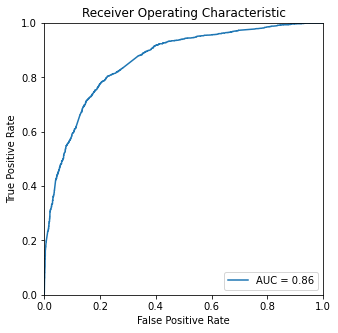

In [98]:
# Plotting the ROC curve

FPR, TPR, threshold = metrics.roc_curve(y_train_pred['Lead conversion'], y_train_pred['Probability of lead conversion'], drop_intermediate = False)
ROC(y_train_pred['Lead conversion'], y_train_pred['Probability of lead conversion'])

With AUC = 86%, our model is good to make predicitions.

**Finding optimal cut-off probability**

We can obtain the optimal cut-off probability from the intersection point of the graph with sensitvity, specificity and accuracy performance metrics plotted against all the cut-off probabilities from 0 to 1, for making predicitions.

In [99]:
# Finding out the possibility of predicting the probability of lead conversion, for all cut-off probabilities  

cutoffs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in cutoffs:
    y_train_pred['Prediction, P cut-off = %0.1f' % i] = y_train_pred['Probability of lead conversion'].map(lambda x: 1 if x > i else 0)
y_train_pred.drop('Prediction of probability', axis = 1, inplace = True)
y_train_pred

,Lead conversion,Probability of lead conversion,"Prediction, P cut-off = 0.0","Prediction, P cut-off = 0.1","Prediction, P cut-off = 0.2","Prediction, P cut-off = 0.3","Prediction, P cut-off = 0.4","Prediction, P cut-off = 0.5","Prediction, P cut-off = 0.6","Prediction, P cut-off = 0.7","Prediction, P cut-off = 0.8","Prediction, P cut-off = 0.9","Prediction, P cut-off = 1.0"
1322,0,0.270969,1,1,1,0,0,0,0,0,0,0,0
2979,1,0.993772,1,1,1,1,1,1,1,1,1,1,0
6460,1,0.922304,1,1,1,1,1,1,1,1,1,1,0
5800,1,0.993772,1,1,1,1,1,1,1,1,1,1,0
4122,0,0.071631,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,1,0.444261,1,1,1,1,1,0,0,0,0,0,0
100,0,0.497530,1,1,1,1,1,0,0,0,0,0,0
5862,1,0.455715,1,1,1,1,1,0,0,0,0,0,0
8624,1,0.298259,1,1,1,0,0,0,0,0,0,0,0


In [100]:
# Computing the sensitvity, specificity and accuracy performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Sensitvity', 'Specificity', 'Accuracy'])

for i in cutoffs:
    cm = confusion_matrix(y_train_pred['Lead conversion'], y_train_pred['Prediction, P cut-off = %0.1f' % i])
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    accuracy = (cm[0,0] + cm[1,1]) / (cm[1, 1] + cm[0, 0] + cm[0, 1] + cm[1, 0])
    perf_all.loc[i] = [i, sensitivity, specificity, accuracy]
perf_all

,P cut-off,Sensitvity,Specificity,Accuracy
0.0,0.0,1.000000,0.000000,0.485925
0.1,0.1,0.993103,0.146023,0.557641
0.2,0.2,0.943908,0.487614,0.709339
0.3,0.3,0.909885,0.608431,0.754915
0.4,0.4,0.809195,0.760104,0.783959
0.5,0.5,0.734713,0.829205,0.783289
0.6,0.6,0.681379,0.863538,0.775022
0.7,0.7,0.554023,0.917862,0.741063
0.8,0.8,0.447816,0.950891,0.706434
0.9,0.9,0.274023,0.980878,0.637399


<AxesSubplot:xlabel='P cut-off'>

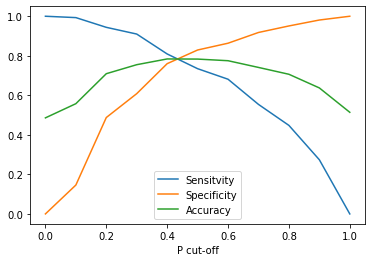

In [101]:
# Finding the optimal cut-off probability

perf_all.plot.line(x = 'P cut-off', y = ['Sensitvity', 'Specificity', 'Accuracy'])

From graph, we obtain 0.44 to be the *optimal* cut-off probability.

**Precision - Recall trade-off**

In our model, recall metric is of more importance since, our target is to achieve a lead conversion rate of 80%. Also, correctness of prediction is not of a risk.

In [102]:
# Computing the precision and recall performance metrics for all cut-off probabilities 

perf_all = pd.DataFrame(columns = ['P cut-off', 'Precision', 'Recall'])

for i in cutoffs:
    cm = confusion_matrix(y_train_pred['Lead conversion'], y_train_pred['Prediction, P cut-off = %0.1f' % i])
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    perf_all.loc[i] = [i, precision, recall]
perf_all

,P cut-off,Precision,Recall
0.0,0.0,0.485925,1.000000
0.1,0.1,0.523636,0.993103
0.2,0.2,0.635210,0.943908
0.3,0.3,0.687153,0.909885
0.4,0.4,0.761246,0.809195
0.5,0.5,0.802612,0.734713
0.6,0.6,0.825167,0.681379
0.7,0.7,0.864419,0.554023
0.8,0.8,0.896044,0.447816
0.9,0.9,0.931250,0.274023


<AxesSubplot:xlabel='P cut-off'>

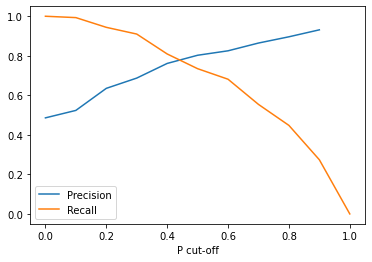

In [103]:
# Finding the precision and recall trade-off

perf_all.plot.line(x = 'P cut-off', y = ['Precision', 'Recall'])

We obtain 0.44 to be the *optimal* cut-off probability from the precision - recall graph as well. Hence, we stick with the probability cut-off at 44%.

**F1 Score for *train* data**

Let's now find the F1 score to check the correctness of precision - recall trade-off.

In [104]:
# Computing F1 score

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('F1 Score = ', round(2 * ((precision * recall) / (precision + recall)),2))

F1 Score =  0.77


We have got 77% as the harmonic mean between the Precision & Recall for our model. Hence, our model is good for providing weightage to either of the metrics depending on the Business requirement, without affecting each other.

**Predicting *train* data with *optimal* cut-off**

Procedure given under the comment section of the code stub.

In [105]:
# Finding out whether it is possible to predict the probability of lead conversion or not for each categorical level, by having 0.44 as the optimal cut-off probability

y_train_pred['Prediction of probability'] = y_train_pred['Probability of lead conversion'].map(lambda x: 1 if x > 0.44 else 0)
y_train_pred = y_train_pred.loc[:, y_train_pred.columns.isin(['Lead conversion', 'Probability of lead conversion', 'Prediction of probability'])]
y_train_pred

,Lead conversion,Probability of lead conversion,Prediction of probability
1322,0,0.270969,0
2979,1,0.993772,1
6460,1,0.922304,1
5800,1,0.993772,1
4122,0,0.071631,0
...,...,...,...
8730,1,0.444261,1
100,0,0.497530,1
5862,1,0.455715,1
8624,1,0.298259,0


**Re-evaluating predictions on *train* data**

Let's now re-evaluate the predictions made on the train dataset with optimal cut-off probability, using performance metrics.

In [106]:
# Computing the confusion matrix

cm = metrics.confusion_matrix(y_train_pred['Lead conversion'], y_train_pred['Prediction of probability'])
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
print('True Negatives  = ', TN, '\tFalse Positives  = ', FP)
print('False Negatives = ', FN, '\tTrue Positives = ', TP)

True Negatives  =  1826 	False Positives  =  475
False Negatives =  471 	True Positives =  1704


In [107]:
# Computing all the performance metrics

print('Sensitivity = ', (round(TP / (TP + FN), 2))*100,'%')
print('Specificity = ', (round(TN / (TN + FP), 2))*100,'%')
print('Accuracy = ', (round((TP + TN) / (TP + TN + FP + FN), 2))*100,'%')
print('Precision = ', (round(TP / (TP + FP), 2))*100,'%')
print('Recall = ', (round(TP / (TP + FN), 2))*100,'%')
print('True Positive rate = ', (round(TP / (TP + FN), 2))*100,'%')
print('False Positive rate = ', (round(1 - (TN / (TN + FP)), 2))*100,'%')
print('True Negative rate = ', (round(TN / (TP + FN), 2))*100,'%')
print('False Negative rate = ', (round(FN / (TN + FP), 2))*100,'%')
print('Positive Predictive value = ', (round(TP / (TP + FP), 2))*100,'%')
print('Negative Predictive value = ', (round(TN / (TN + FN), 2))*100,'%')

Sensitivity =  78.0 %
Specificity =  79.0 %
Accuracy =  79.0 %
Precision =  78.0 %
Recall =  78.0 %
True Positive rate =  78.0 %
False Positive rate =  21.0 %
True Negative rate =  84.0 %
False Negative rate =  20.0 %
Positive Predictive value =  78.0 %
Negative Predictive value =  79.0 %


All the performance metrics appear to impact our model positively.

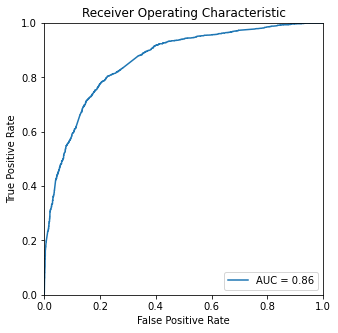

In [108]:
# Plotting the ROC curve

FPR, TPR, threshold = metrics.roc_curve(y_train_pred['Lead conversion'], y_train_pred['Probability of lead conversion'], drop_intermediate = False)
ROC(y_train_pred['Lead conversion'], y_train_pred['Probability of lead conversion'])

With AUC = 86%, our model is good to make predicitions.

In [109]:
# Computing F1 score

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('F1 Score = ', round(2 * ((precision * recall) / (precision + recall)),2))

F1 Score =  0.78


We have got 78% as the harmonic mean between the Precision & Recall for our model. Hence, our model is good for providing weightage to either of the metrics depending on the Business requirement, without affecting each other.

**Feature selection in *test* data**

We have already selected the required features in our *train* dataset using combined feature selection method of both automated & manual approach. We select the same set of features in our *test* dataset.

In [110]:
# Finding shape of X_test

X_test.shape

(1919, 73)

In [111]:
# Removing the columns in test data same as that removed in train data

X_test = X_test.loc[:, X_test.columns.isin(rfe_select)]
X_test.shape

(1919, 12)

**Making predictions on *test* data**

We have already divided (I/P & O/P variables) and, scaled (standardized) the test dataset, after test-train data split, just as done in the train dataset.

Let's now make predictions on *test* data using what already learnt from *train* data. Procedure given for the same under the comment section of each code stub.

In [112]:
# Predicting the probability of lead conversion for each categorical level

y_test_pred = pd.DataFrame({'Lead conversion':y_test.values, 'Probability of lead conversion':(logr4.fit()).predict(sm.add_constant(X_test[rfe_select.columns]))})
y_test_pred

,Lead conversion,Probability of lead conversion
5390,1,0.936315
584,0,0.200343
2894,1,0.840708
7626,0,0.128678
8418,0,0.601998
...,...,...
7036,1,0.983796
7498,1,0.309232
1739,1,0.951067
3612,0,0.186203


In [113]:
# Finding out whether it is possible to predict the probability of lead conversion or not for each categorical level, by having 0.44 as the optimal cut-off probability

y_test_pred['Prediction of probability'] = y_test_pred['Probability of lead conversion'].map(lambda x: 1 if x > 0.44 else 0)
y_test_pred

,Lead conversion,Probability of lead conversion,Prediction of probability
5390,1,0.936315,1
584,0,0.200343,0
2894,1,0.840708,1
7626,0,0.128678,0
8418,0,0.601998,1
...,...,...,...
7036,1,0.983796,1
7498,1,0.309232,0
1739,1,0.951067,1
3612,0,0.186203,0


**Evaluating predictions on *test* data**

Let's now evaluate the predictions made on the *test* dataset with *train* data, using performance metrics.

In [114]:
# Computing the confusion matrix

cm = metrics.confusion_matrix(y_test_pred['Lead conversion'], y_test_pred['Prediction of probability'])
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
print('True Negatives  = ', TN, '\tFalse Positives  = ', FP)
print('False Negatives = ', FN, '\tTrue Positives = ', TP)

True Negatives  =  809 	False Positives  =  203
False Negatives =  192 	True Positives =  715


In [115]:
# Computing all the performance metrics

print('Sensitivity = ', (round(TP / (TP + FN), 2))*100,'%')
print('Specificity = ', (round(TN / (TN + FP), 2))*100,'%')
print('Accuracy = ', (round((TP + TN) / (TP + TN + FP + FN), 2))*100,'%')
print('Precision = ', (round(TP / (TP + FP), 2))*100,'%')
print('Recall = ', (round(TP / (TP + FN), 2))*100,'%')
print('True Positive rate = ', (round(TP / (TP + FN), 2))*100,'%')
print('False Positive rate = ', (round(1 - (TN / (TN + FP)), 2))*100,'%')
print('True Negative rate = ', (round(TN / (TP + FN), 2))*100,'%')
print('False Negative rate = ', (round(FN / (TN + FP), 2))*100,'%')
print('Positive Predictive value = ', (round(TP / (TP + FP), 2))*100,'%')
print('Negative Predictive value = ', (round(TN / (TN + FN), 2))*100,'%')

Sensitivity =  79.0 %
Specificity =  80.0 %
Accuracy =  79.0 %
Precision =  78.0 %
Recall =  79.0 %
True Positive rate =  79.0 %
False Positive rate =  20.0 %
True Negative rate =  89.0 %
False Negative rate =  19.0 %
Positive Predictive value =  78.0 %
Negative Predictive value =  81.0 %


All the performance metrics appear to impact our model positively.

**Plotting Receiver Operating Characteristic (ROC) curve for *test* data**

Let us plot the ROC curve to find out if our model is good to make predicitions, by obtaining the Area Under the Curve (AUC).

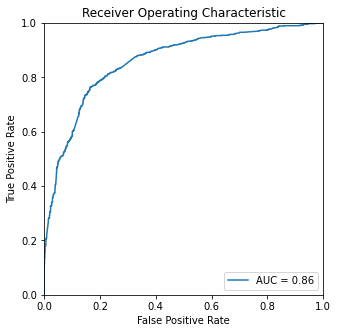

In [116]:
# Plotting the ROC curve

FPR, TPR, threshold = metrics.roc_curve(y_test_pred['Lead conversion'], y_test_pred['Probability of lead conversion'], drop_intermediate = False)
ROC(y_test_pred['Lead conversion'], y_test_pred['Probability of lead conversion'])

With AUC = 86%, our model (train + test) is good to make predicitions.

**F1 Score for *test* data**

Let's now find the F1 score to check the correctness of precision - recall trade-off.

In [117]:
# Computing F1 score

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('F1 Score = ', round(2 * ((precision * recall) / (precision + recall)),2))

F1 Score =  0.78


We have got 78% as the harmonic mean between the Precision & Recall for our model. Hence, our model (train + test) is good for providing weightage to either of the metrics depending on the Business requirement, without affecting each other.

Therefore, our model yields satisfactory results.

## Model equation

Let us derive the equation for our final model.

A logistic regression is also linear in nature, however yields the output in the form of predictive power due to the *logit* function. Predictive power is how probable is the prediction of target variable correctly according to the Business requirements. Predictive power is the quantification of prediction probability.

In [118]:
# Finding the predictive power of each variable in our final model

pred_pow = round(logr4.fit().params[1:] / logr4.fit().params[1:].max(), 2)
pred_pow

Total Time Spent on Website                   0.32
Lead Origin_Lead Add Form                     1.00
Lead Source_Olark Chat                        0.39
Lead Source_Welingak Website                  0.67
Do Not Email_Yes                             -0.42
Last Activity_Converted to Lead              -0.35
Last Activity_Olark Chat Conversation        -0.35
Last Activity_SMS Sent                        0.31
Last Activity_Unsubscribed                    0.30
What is your current occupation_Student      -0.63
What is your current occupation_Unemployed   -0.67
Last Notable Activity_Unreachable             0.95
dtype: float64

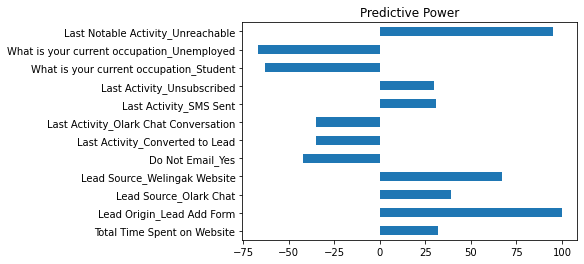

In [119]:
# Visualizing the predictive power of the features

(100 * pred_pow).plot.barh()
plt.title('Predictive Power')
plt.show()

In [120]:
# Computing the model equation
    
P_Converted = sum(abs(round(logr4.fit().params[1:] / logr4.fit().params[1:].max(), 2))) / len(pred_pow)
P_Converted

0.53

Our model is of the form:

**P(Converted:{Total Time Spent on Website = 0.32, Lead Origin_Lead Add Form = 1.00, Lead Source_Olark Chat = 0.39, Lead Source_Welingak Website = 0.67, Do Not Email_Yes = -0.42, Last Activity_Converted to Lead = -0.35, Last Activity_Olark Chat Conversation = -0.35, Last Activity_SMS Sent = 0.31, Last Activity_Unsubscribed = 0.30, What is your current occupation_Student = -0.63, What is your current occupation_Unemployed = -0.67, Last Notable Activity_Unreachable = 0.95}) = 53 %**

We could see that the feature variables influences the predictive power of our model both positively and negatively, with an overall conversion rate of 53%. The conversion rate of our model is still mediocre, though evaluation results were satisfactory. This maybe due to dropping many variables even before the feature selection step, as a result of bulk missing values. However, there is a descent increase in the conversion rate of our model compared to the given model.

## Lead Score

Let's assign a lead score dynamically to each lead. 

In [121]:
# Shape of predicted train

y_train_pred.shape

(4476, 3)

In [122]:
# Shape of predicted test

y_test_pred.shape

(1919, 3)

In [123]:
# Appending predicted train & test data together

y_pred = y_train_pred.append(y_test_pred)
y_pred

,Lead conversion,Probability of lead conversion,Prediction of probability
1322,0,0.270969,0
2979,1,0.993772,1
6460,1,0.922304,1
5800,1,0.993772,1
4122,0,0.071631,0
...,...,...,...
7036,1,0.983796,1
7498,1,0.309232,0
1739,1,0.951067,1
3612,0,0.186203,0


In [124]:
# Assigning lead score

y_pred_score = pd.DataFrame()
y_pred_score['Lead Score (in %)'] = round(100 * y_pred['Probability of lead conversion'], 2)
y_pred_score['Conversion chance'] = y_pred['Probability of lead conversion'].map(lambda x: 'Hot' if x > 0.44 else 'Cold')
y_pred_score

,Lead Score (in %),Conversion chance
1322,27.10,Cold
2979,99.38,Hot
6460,92.23,Hot
5800,99.38,Hot
4122,7.16,Cold
...,...,...
7036,98.38,Hot
7498,30.92,Cold
1739,95.11,Hot
3612,18.62,Cold


                                                  --->---end of code---<---

$*$ GitHub Collaborator: Akshay Anand (@aakyaa5534)